# Machine Learning Project : Personal Loan Campaign

### Problem Statement

**Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

**Objective**

To predict whether a liability customer will buy a personal loans,to understand which customer attributes are most significant in driving purchases,and to identify Which segment of customers should be targeted more.

**Data Dictionary**

1. `ID`: Customer ID
2. `Age`: Customer’s age in completed years
3. `Experience`: #years of professional experience
4. `Income`: Annual income of the customer (in thousand dollars)
5. `ZIP Code`: Home Address ZIP code.
6. `Family`: the Family size of the customer
7. `CCAvg`: Average spending on credit cards per month (in thousand dollars)
8. `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. `Mortgage`: Value of house mortgage if any. (in thousand dollars)
10. `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign?
11. `Securities_Account`: Does the customer have securities account with the bank?
12. `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank?
13. `Online`: Do customers use internet banking facilities?
14. `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


**Import important libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ( accuracy_score, recall_score, precision_score, confusion_matrix,
f1_score, make_scorer)


**Loading The Dataset**

In [5]:
#loading the dataset
data=pd.read_csv('Loan_Modelling.csv')

**Making a Copy of the dataset**

In [7]:
# making a copy
dx=data.copy()

In [15]:
# printing first 5 of the dataset
dx[dx['Personal_Loan']==1].shape[0]/dx.shape[0]

0.096

**Shape of the data**

In [12]:
dx.shape

(5000, 14)

**Observation:**
 - There are 14 Columns and 5000 Rows in the dataset  

In [14]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation:**
- There are Total 12 Integer datatypes and One floating datatype in given Data.

In [16]:
dx.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observation:**
- There are no null values present in the data. 

In [18]:
dx.duplicated().sum()

0

**Observation:**
- There are no Duplicates present in the data. 

In [20]:
dx=dx.drop('ID',axis=1)

**Observation:**
- Since,There are no Duplicates present in the data and Column Id can be removed as it has no significance in the problem.  

In [22]:
dx.describe(include='all').T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

**Observations:**
- `Age`: The average `Age` of customers being 45 years varying from 23 to 67 years with almost 75% of customers `Age` being 55 or less than 55 years old.
- `Experience`: The `Experience' column has error since the minimum experience is in the negative, which is rectified after Eda.
- `Income`:The avgerage `Income`of the customers is approx 74K dollars varying between 8k to 224k dollars with almost 75% of customers having 98k or less dollars as salary.
- `Zipcode`: Here `Zipcode` need to treated as categories and Eda will be done know its significance.
- `Family`: Average `Family` size is 2 varying between 1 to 4 Numbers with almost 50 % `Family` size is 2 or less than 2 numbers.
- `CCAvg`: Average `CCAvg`spending in credit card is Approx 2k dollars varying withing 0 to 10k with over almost 50% of customers spending less than 2k dollars.
- `Education`: on an average most of the cutomers have `Education` upto graduate varying from an undergrad to a Professional.
- `Mortgage`: On an average the `Mortgage` held by customer is 56k dollars.
- `Personal_Loan`,`Securities_Account`,`CD_Account`,`Online`,`CreditCard`: all these datas are categorical data so they don't clear staistics.      

### EDA

#### univariate analysis

In [26]:
#function for unvariate analysis of data with values 
def uni_value(d,e):
    fig,ax=plt.subplots(2,1,figsize=(10,5),sharex=True)
    ax=ax.flatten()
    sns.histplot(data=d,x=e,ax=ax[0]);
    sns.boxplot(data=d,x=e,ax=ax[1],showmeans=True);
    fig.suptitle(f'The Histogram and box plots of {e}')
    print(f'mean:{d[e].mean()} & median:{d[e].median()}')
    
    plt.xticks();
    plt.show()

**1) Age**

mean:45.3384 & median:45.0


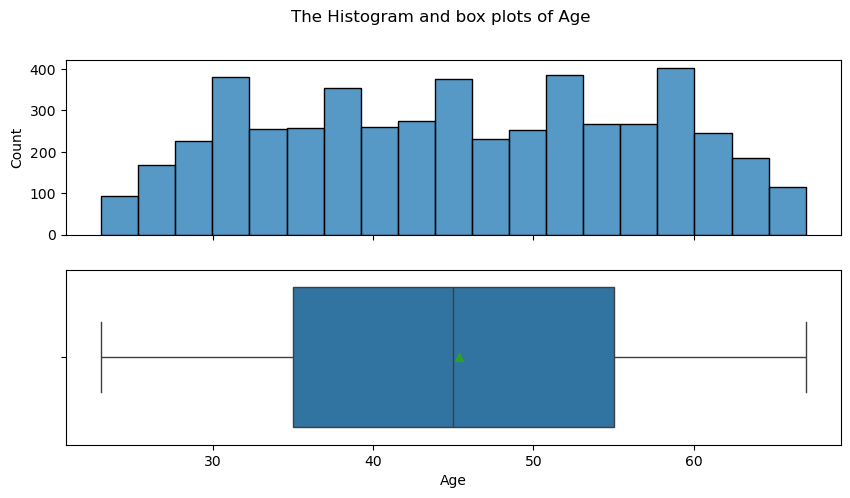

In [28]:
uni_value(dx,'Age')

**Observation:**
- The `Age` column age negligible skewnes to a slight right Skewness since mean is slightly greater than median. 

**2)Experience**

mean:20.1046 & median:20.0


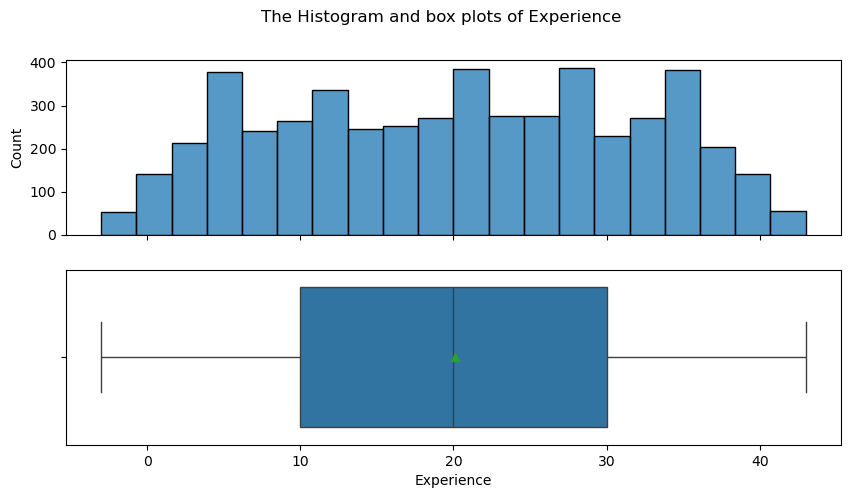

In [31]:
uni_value(dx,'Experience')


**Observation**:
- The `Experience` column also have Negligible to slight right skewness since mean is greater.

**3)Income**

mean:73.7742 & median:64.0


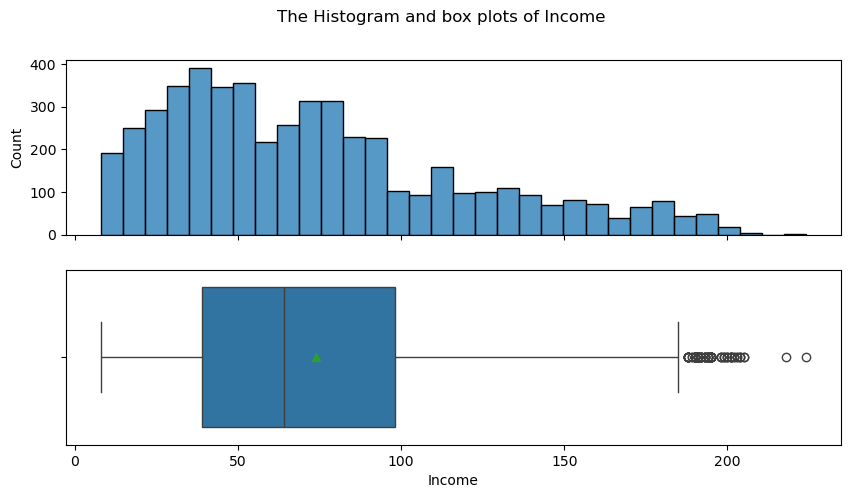

In [34]:
uni_value(dx,'Income')


**Observation**:
- `Income`data is a Right-Skewed Data with mean greater than median.
- Outliers are observed in the income data.

**4.Family**

mean:2.3964 & median:2.0


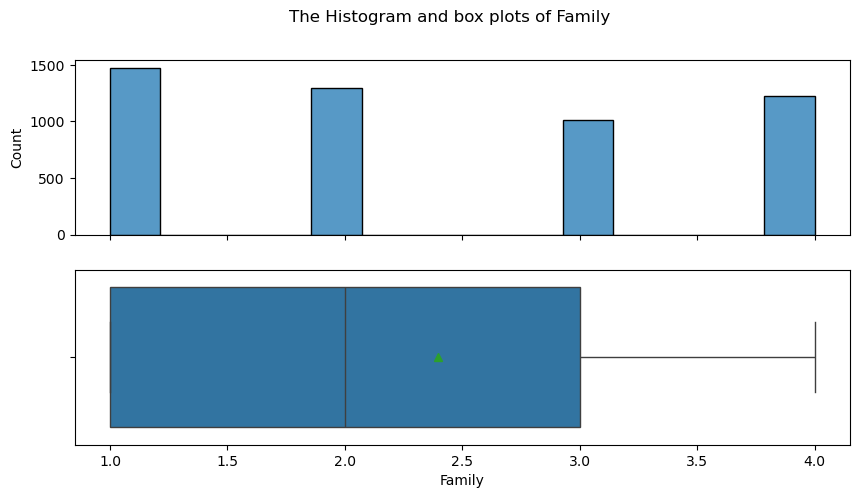

In [37]:
uni_value(dx,'Family')

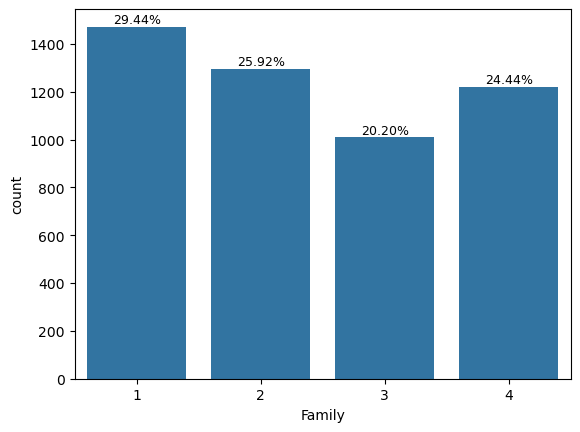

In [38]:
s=sns.countplot(data=dx,x='Family')
t=len(dx['Family'])
for i in s.patches:
    per=(i.get_height()/t)*100
    s.text(i.get_x()+i.get_width()/2,i.get_height()+1,f'{per:.2f}%',ha='center',va='bottom',fontsize=9)
plt.show()

**Observation**:
- `Family` is a right Skewed data since mean greater than median and histogram is bit off due to the bins.
- `Family` data shows that large part of customers being single over 29.44% of customers.

**5. CCAvg**

mean:1.9379380000000002 & median:1.5


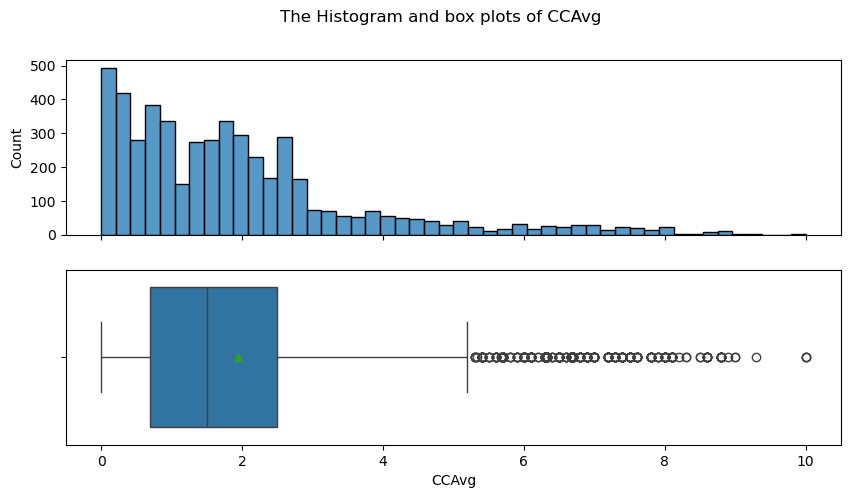

In [41]:
uni_value(dx,'CCAvg')


**Observation**:
- `CCavg` data is right skewed data with mean being greater than median.
- There are Outliers present in the data.

**6. mortgage**

mean:56.4988 & median:0.0


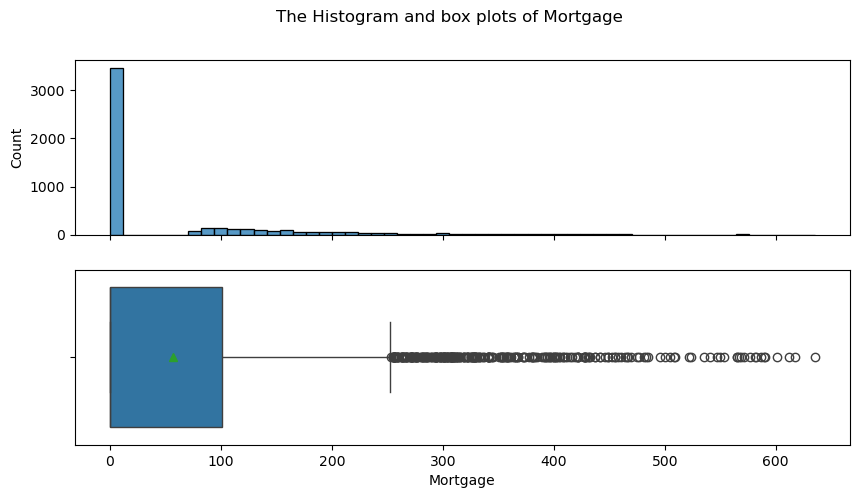

In [44]:
uni_value(dx,'Mortgage')

**Observation**:
- The `Mortagage` data is heavily right-Skewed.
- There are outliers present in the data. 

**7. Zipcode** 

In [47]:
# since Zipcode is categorical value we are checking the number of unique values
dx['ZIPCode'].nunique()

467

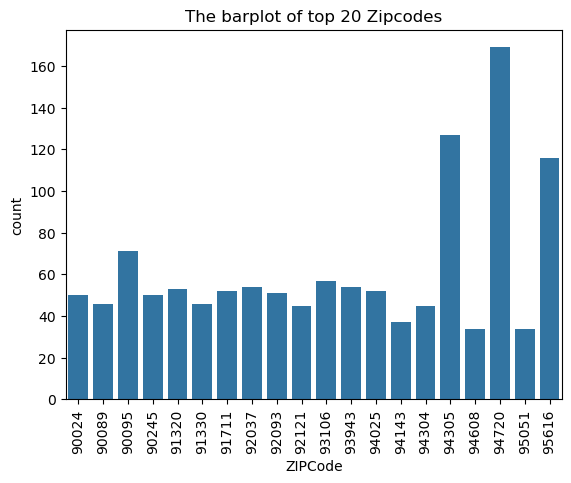

In [48]:
# top 20 Zipcodes
t=dx['ZIPCode'].value_counts().head(20).index.tolist()
sns.countplot(data=dx[dx['ZIPCode'].isin(t)],x='ZIPCode')
plt.title('The barplot of top 20 Zipcodes')
plt.xticks(rotation=90);

**Observation**:
- Since Zipcode categorical and in more numbers around 467 Zipcodes top 20 considred for analysis.
- The zipcode with Number of customers is 94720 which belongs to  Berkeley, California.

**8. Rest of the categorical values**

In [51]:
dx.columns


Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

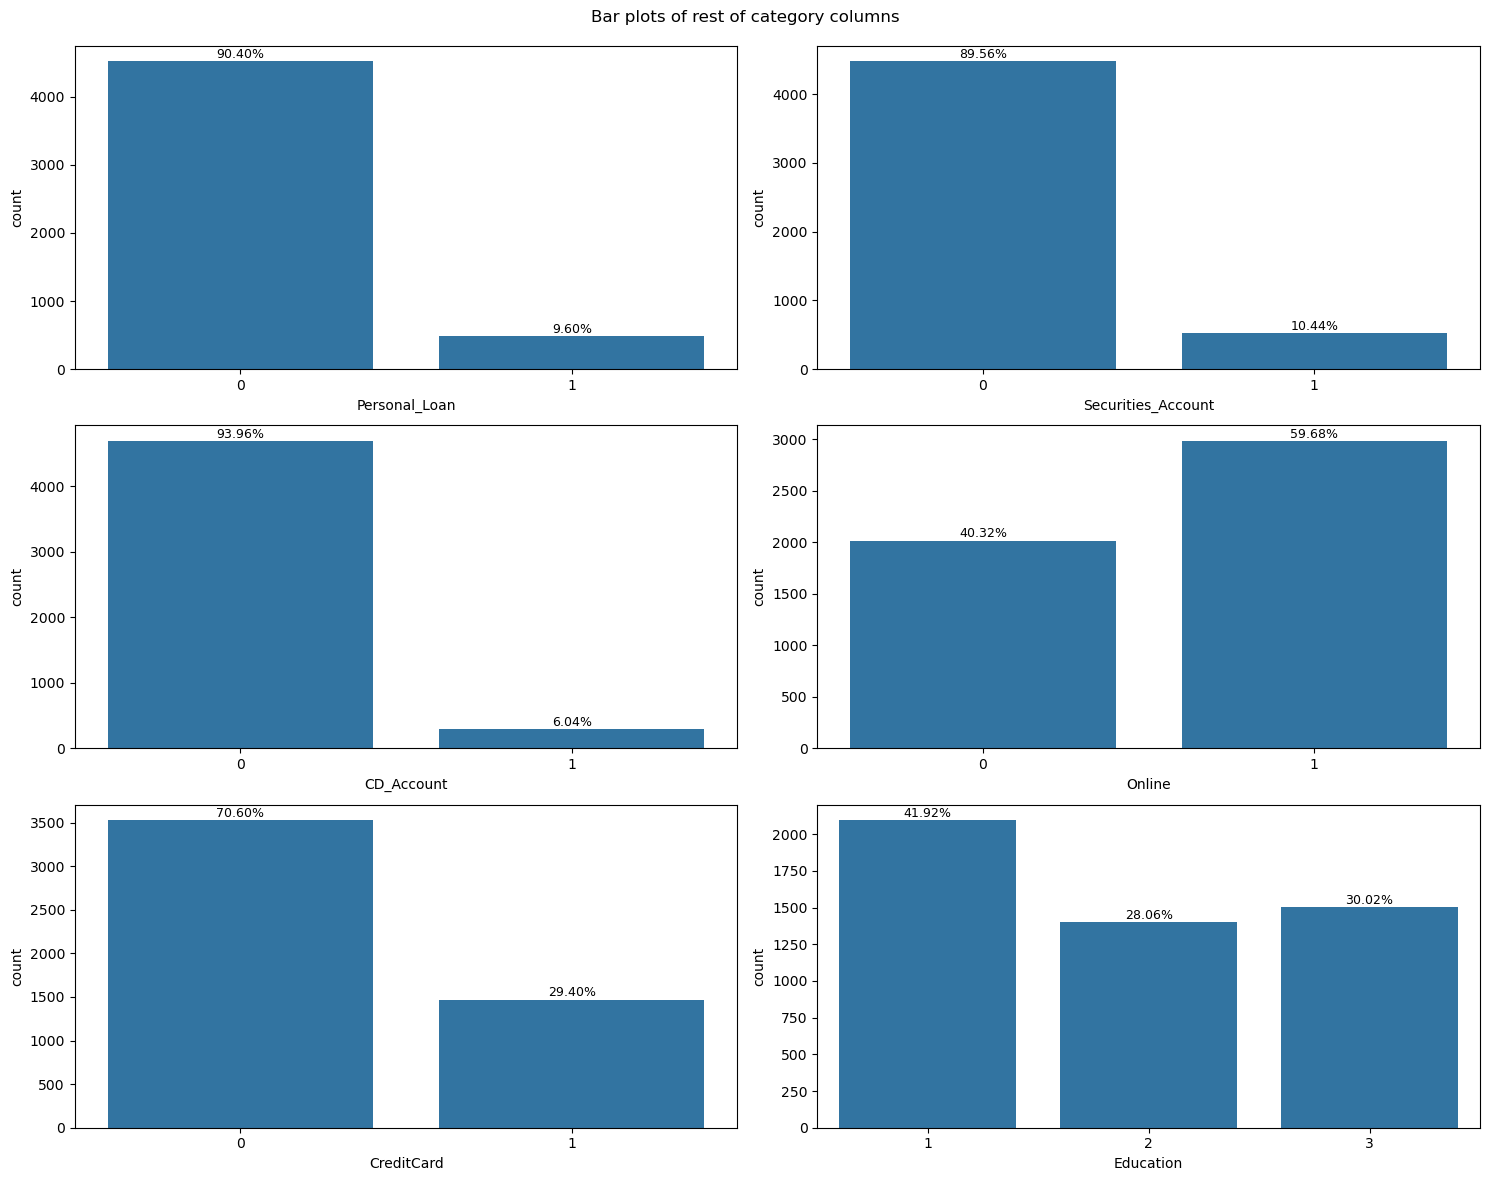

In [52]:
# considering all the categoricals for analysis
cat_cols=['Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard','Education']
fi,axi=plt.subplots(3,2,figsize=(15,12))
axi=axi.flatten()
for i,j in enumerate(cat_cols):
    sns.countplot(data=dx,x=j,ax=axi[i])
    total=len(dx[j])
    for a in axi[i].patches:
        perc=(a.get_height()/total)*100
        axi[i].text(a.get_x()+a.get_width()/2,a.get_height()+1,f'{perc:.2f}%',fontsize=9,ha='center',va='bottom')
        

plt.tight_layout()
fi.suptitle('Bar plots of rest of category columns')
plt.subplots_adjust(top=0.95)
plt.show()


**Observation**:
1. `Personal Loan`:majority of the customers don't have loan around 90.4% after last campaign.
2. `Securities_Account`:Around 10.44 customers have Securities account.
3. `CD_Account`:Only 6.04% have certificate of deposit account.
4. `Online`:majority of the customers use this Online facility around 59.68%.
5. `CreditCard`:majority of the customers don't have Credit Cards around 70.6%.
6. `Education`:majority of the customers have education upto UnderGrad around 41.92%.

**2. Bi-Variate analysis**

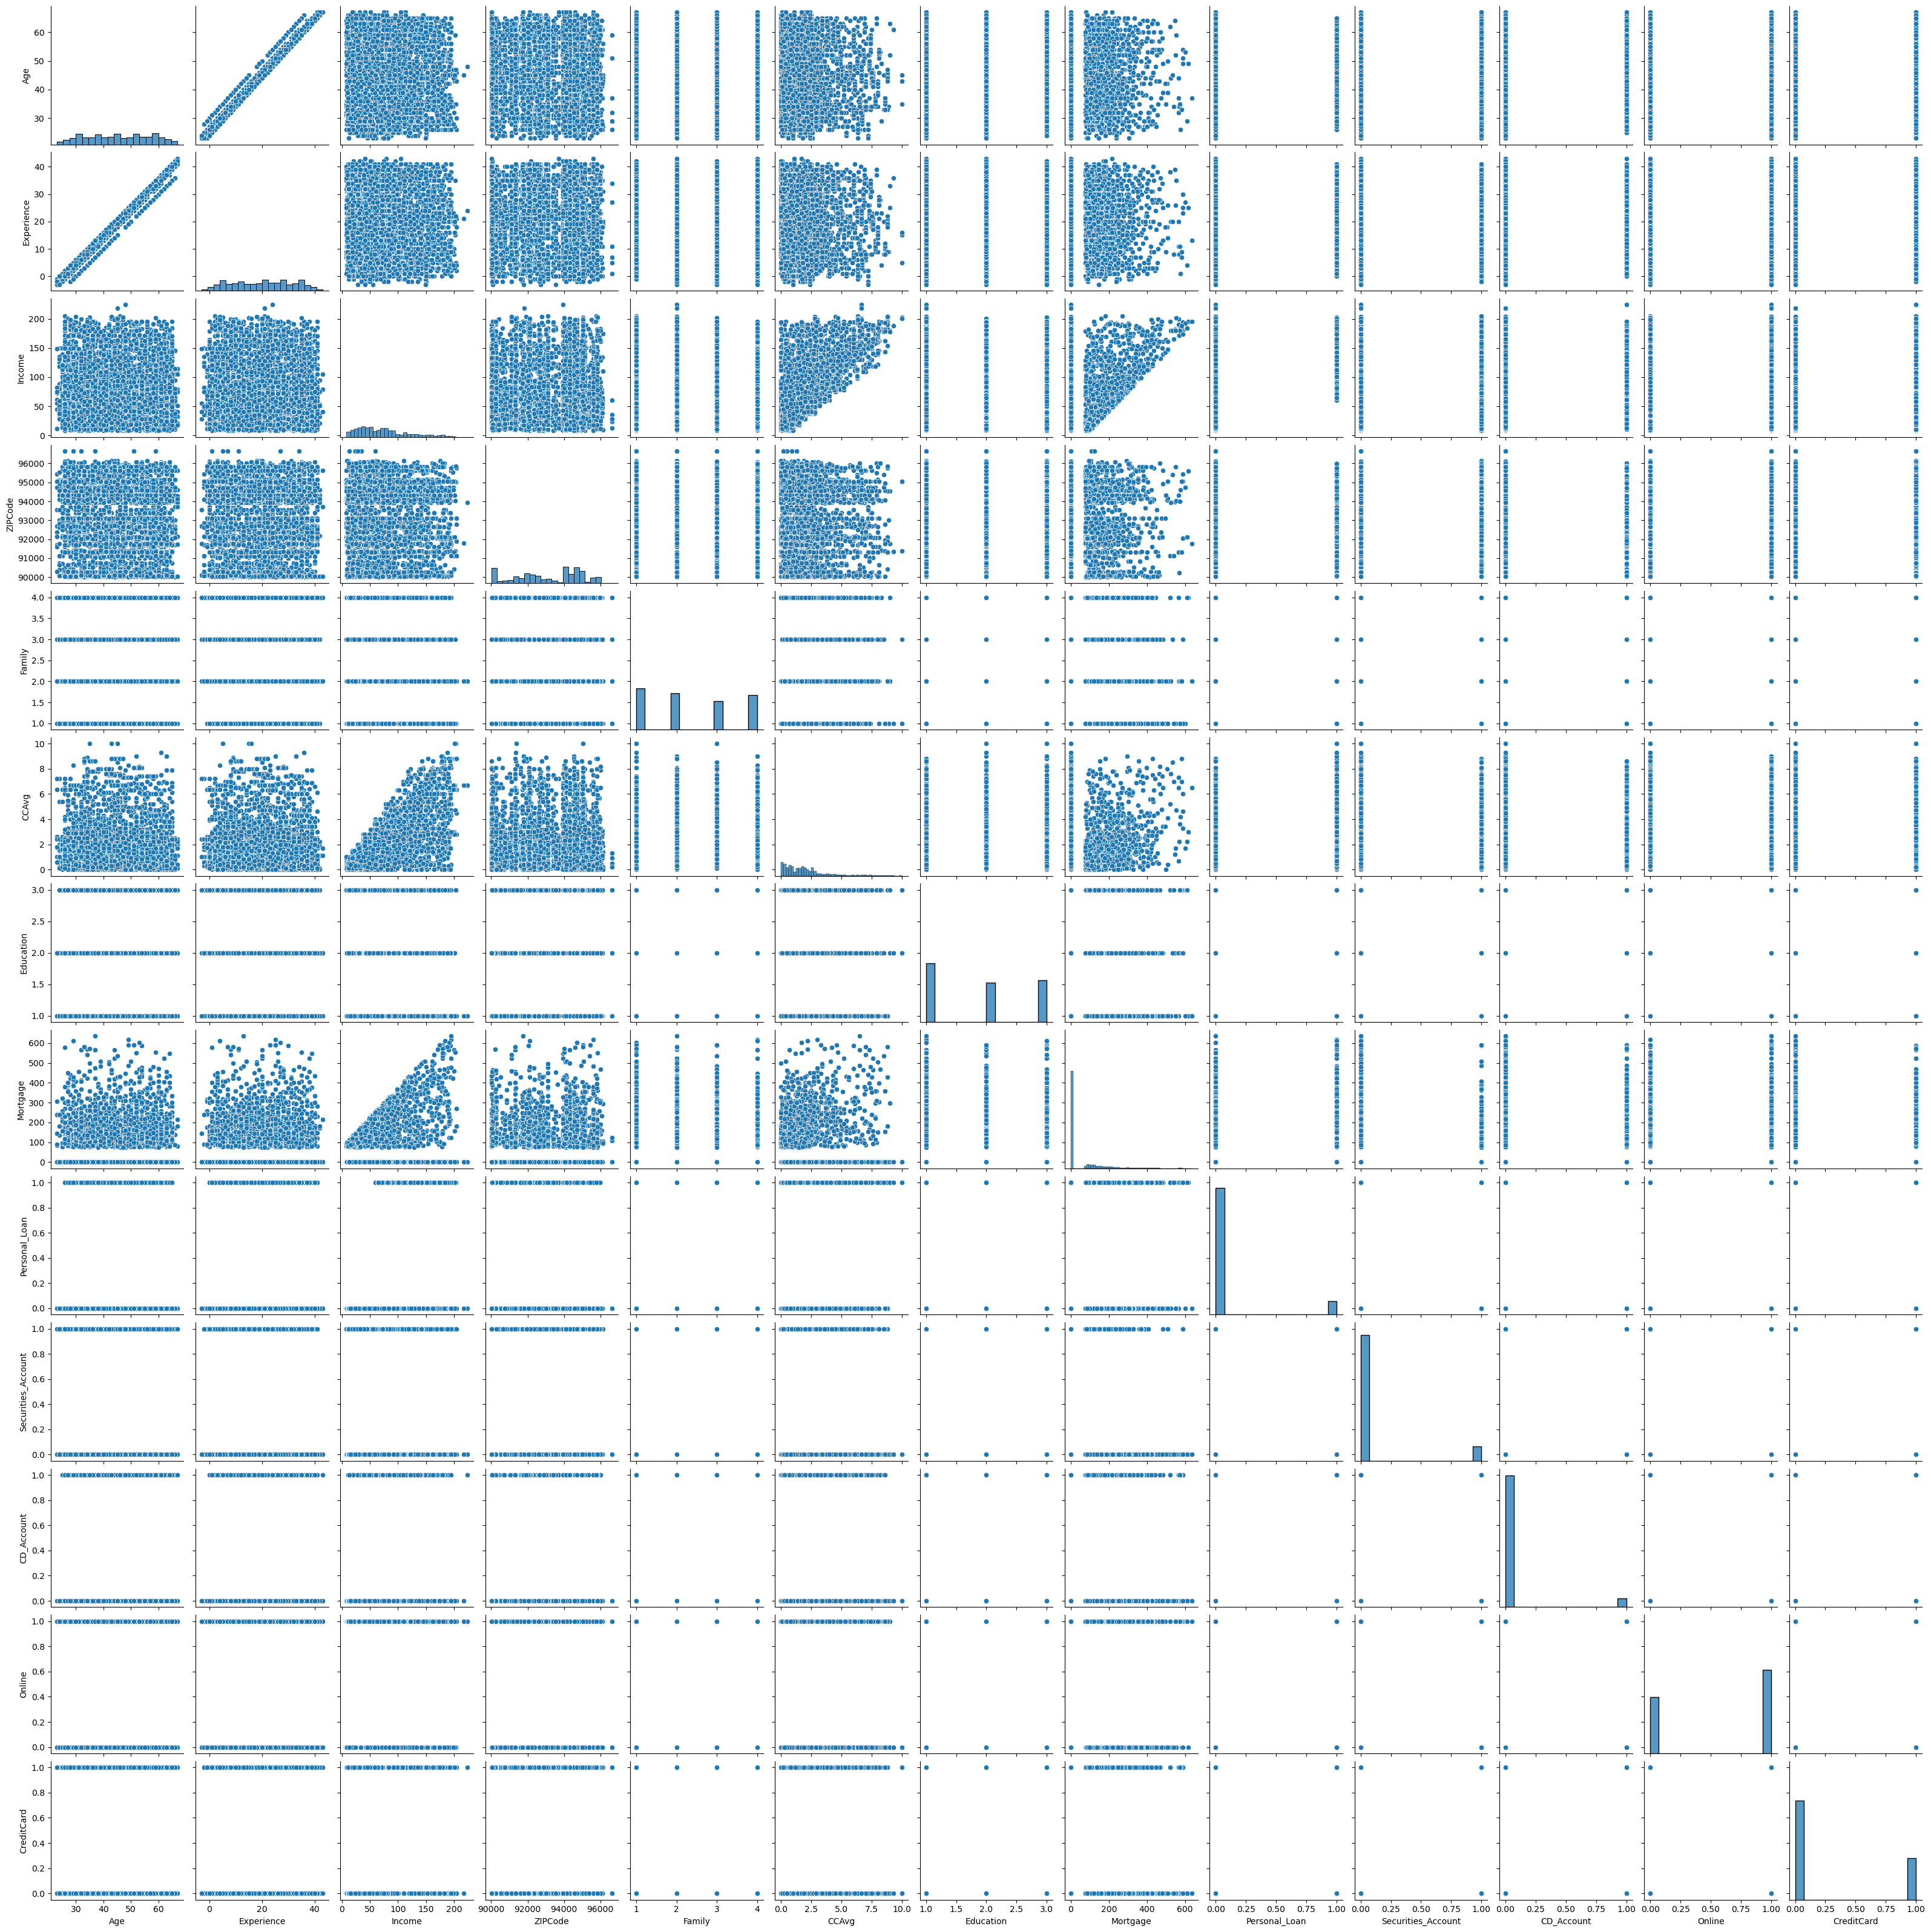

In [55]:
sns.pairplot(data=dx)

<Axes: >

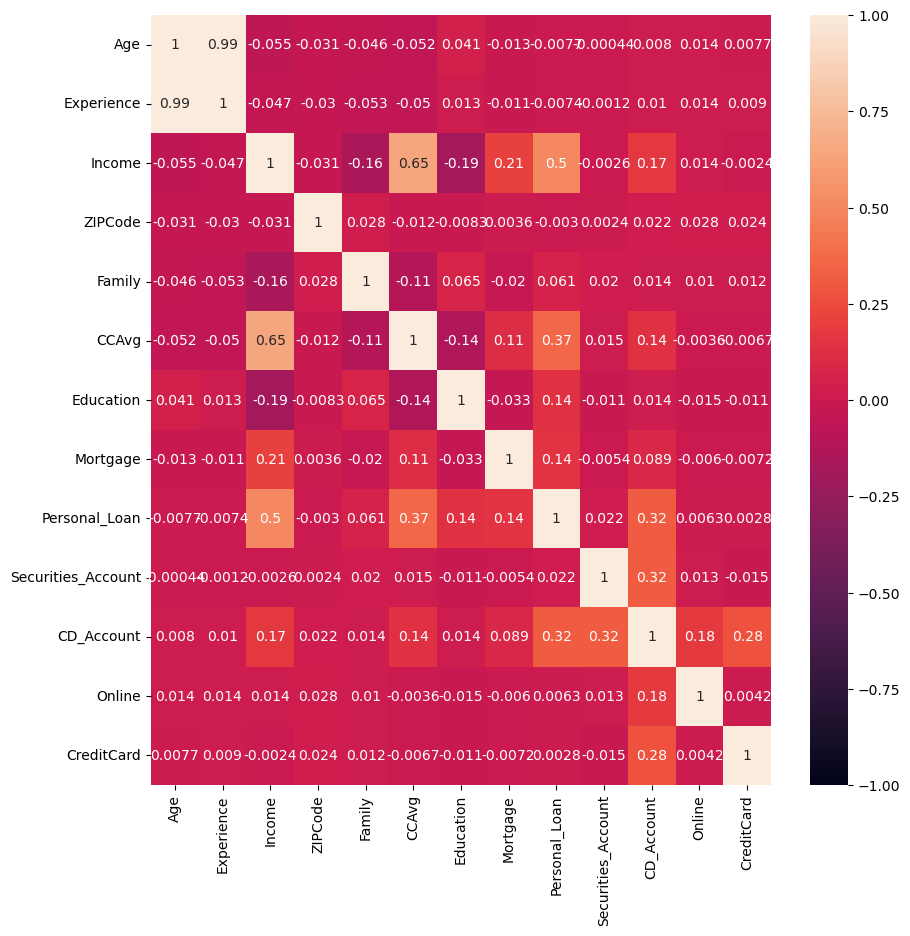

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dx.corr(),annot=True,vmax=1,vmin=-1)

**Observation :**
1. `Age` and `Experience` have strong correlation with each other.
2. `ZipCode` seems to have no relation with `Personal_Loan` as it just showing number places having and not having loan.
3. `family`,`Education` seems to have low correlation with `Personal_Loan` 


In [64]:
# plotting with reference to the target variable:
Target='Personal_Loan'

1) **numerical value columns vs Personal loan**

In [71]:
dx.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [72]:
# bivariate analysis of numerical columns with Personal Loan
ncols=['Age', 'Experience', 'Income', 'CCAvg','Mortgage']
Target='Personal_Loan'
def bivariate_numericals_wrt_target(d,Target,x):
    fq,axc=plt.subplots(2,2,figsize=(10,5))
    axc=axc.flatten()
    sns.histplot(data=dx,x=x,hue=Target,kde=True,ax=axc[0])
    sns.boxplot(data=dx,x=Target,y=x,ax=axc[1])
    sns.boxplot(data=dx,x=Target,y=x,showfliers=False,ax=axc[2])
    fq.delaxes(axc[3])
    plt.tight_layout()
    fq.suptitle(f'Bivariate analysis{Target} with respect to {x}')
    plt.subplots_adjust(top=0.9)
    plt.show()



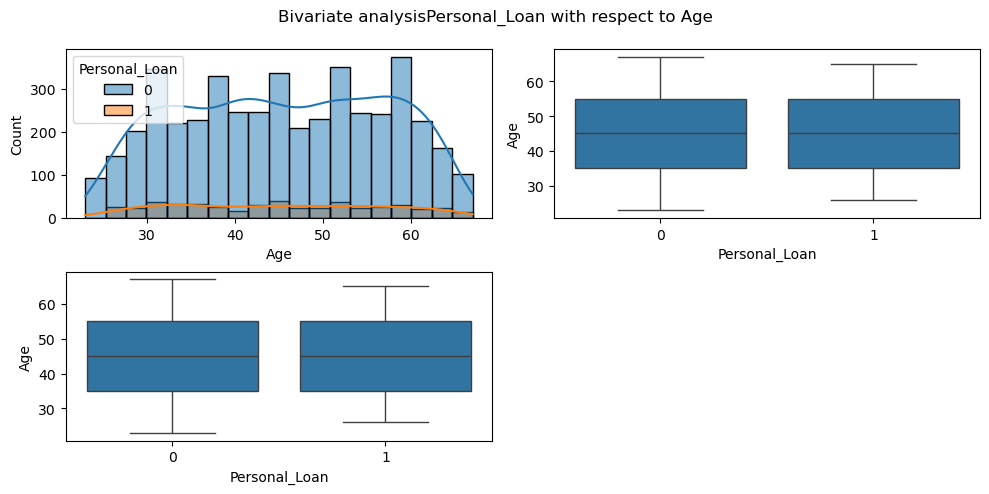

------------------------------------------------------------------------------------------------------------------------------------------------------


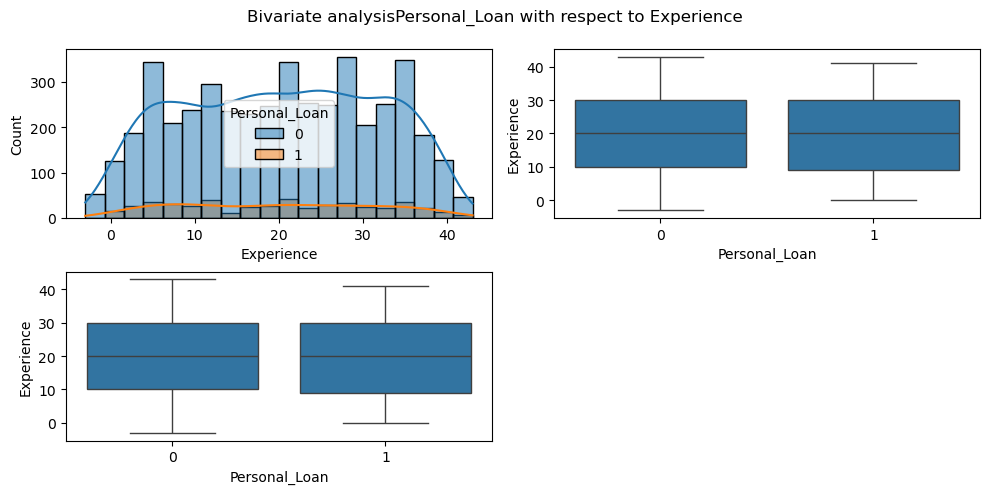

------------------------------------------------------------------------------------------------------------------------------------------------------


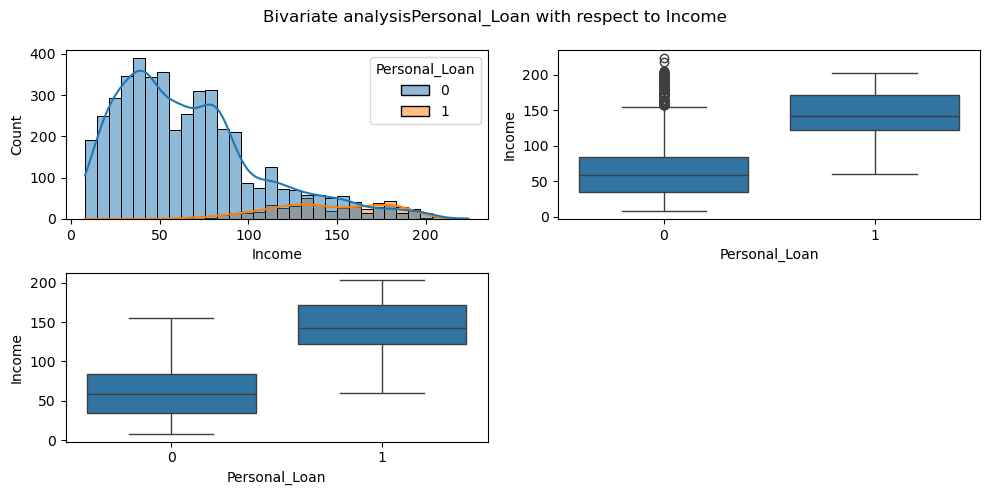

------------------------------------------------------------------------------------------------------------------------------------------------------


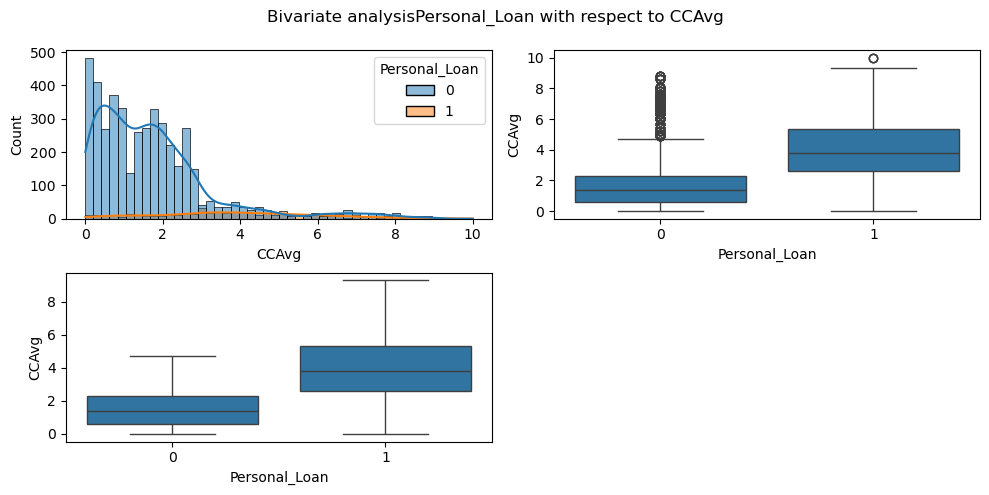

------------------------------------------------------------------------------------------------------------------------------------------------------


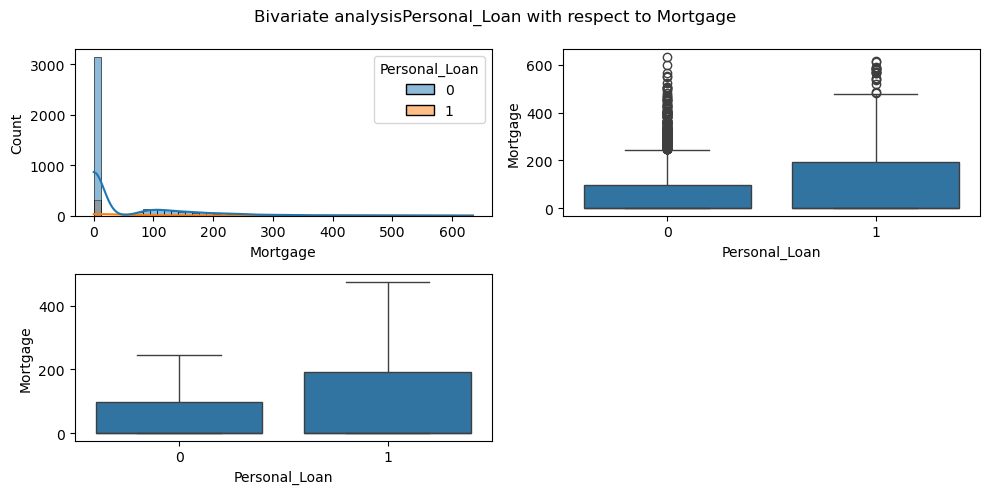

------------------------------------------------------------------------------------------------------------------------------------------------------


In [73]:
for i in ncols:
    bivariate_numericals_wrt_target(dx,Target,i)
    print('-'*150)

In [74]:
Cat_cols=['Family','Education', 'Securities_Account','CD_Account', 'Online', 'CreditCard']
def bivariate_categoricals_wrt_target(d,Target,y):
    fe,axv=plt.subplots(2,2,figsize=(10,5))
    axv=axv.flatten()
    a=sns.countplot(data=dx,x=y,hue=Target,ax=axv[0])
    for i in a.patches:
        total=len(d['Personal_Loan'])
        perc=(i.get_height()/total)*100
        axv[0].text(i.get_x()+i.get_width()/2,i.get_height()+1,f'{perc:.2f}%',ha='center',va='bottom')
    sns.boxplot(data=dx,x=Target,y=y,ax=axv[1])
    sns.boxplot(data=dx,x=Target,y=y,ax=axv[2])
    fe.delaxes(axv[3])
    fe.suptitle(f'Bivariate analysis{Target} with respect to {y}')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    


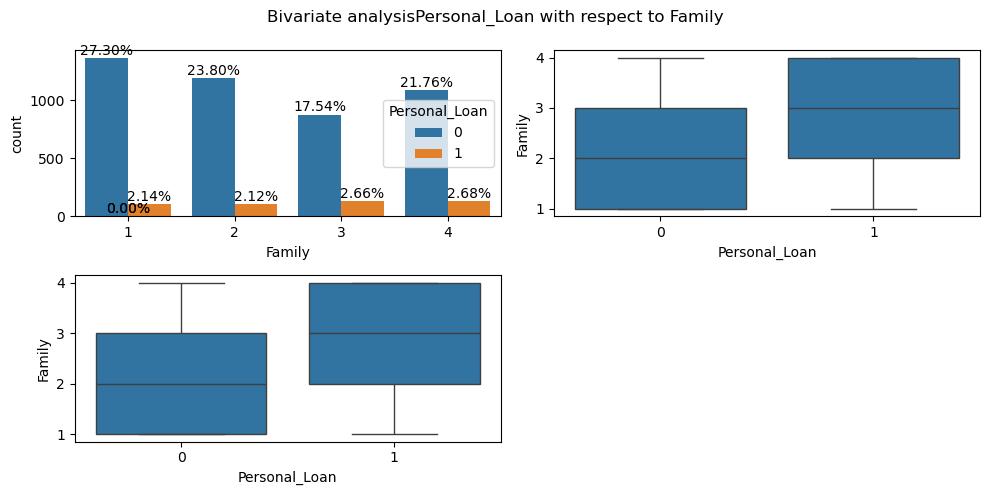

------------------------------------------------------------------------------------------------------------------------------------------------------


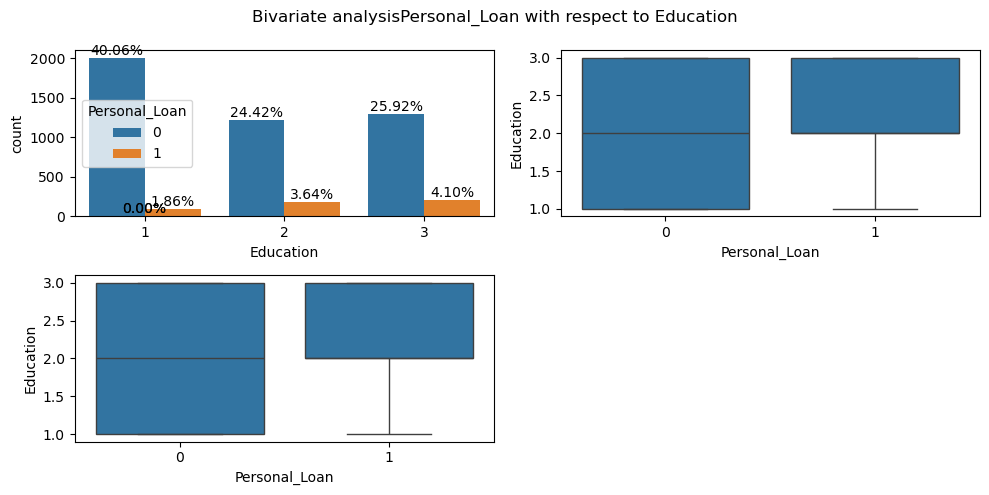

------------------------------------------------------------------------------------------------------------------------------------------------------


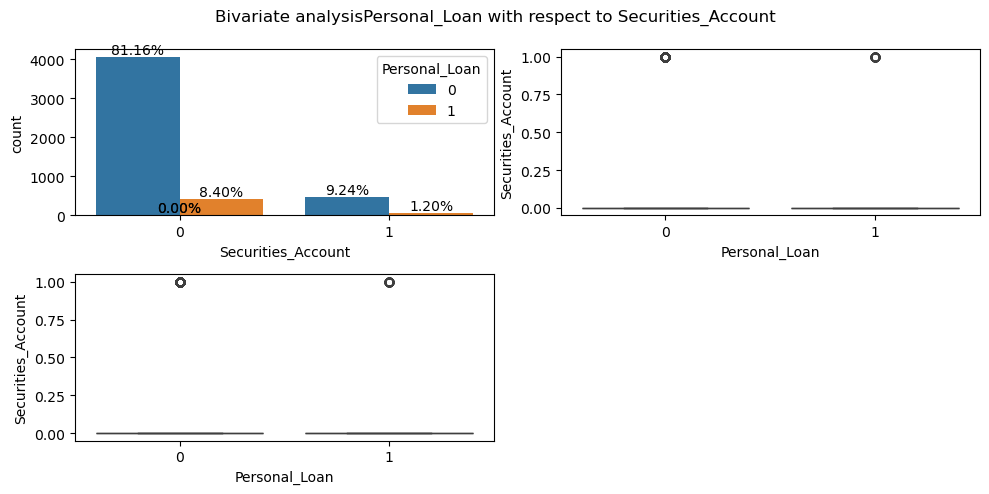

------------------------------------------------------------------------------------------------------------------------------------------------------


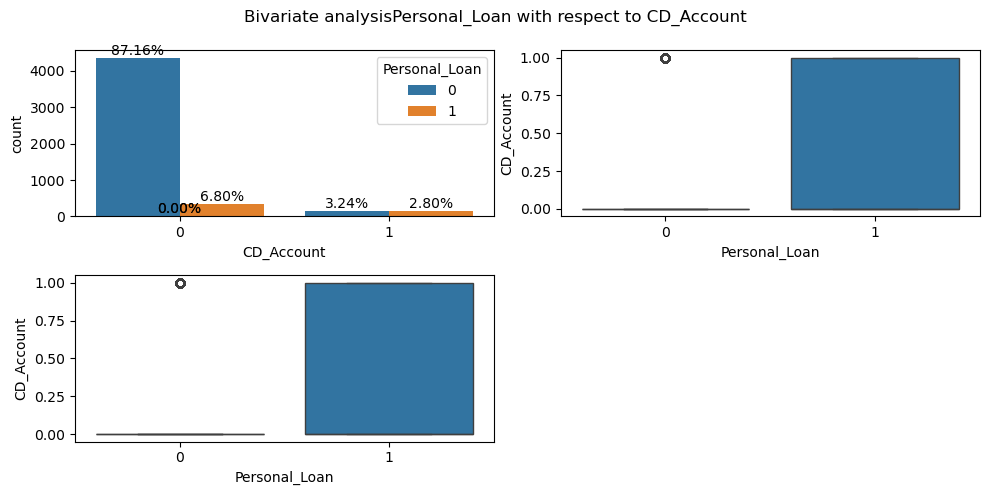

------------------------------------------------------------------------------------------------------------------------------------------------------


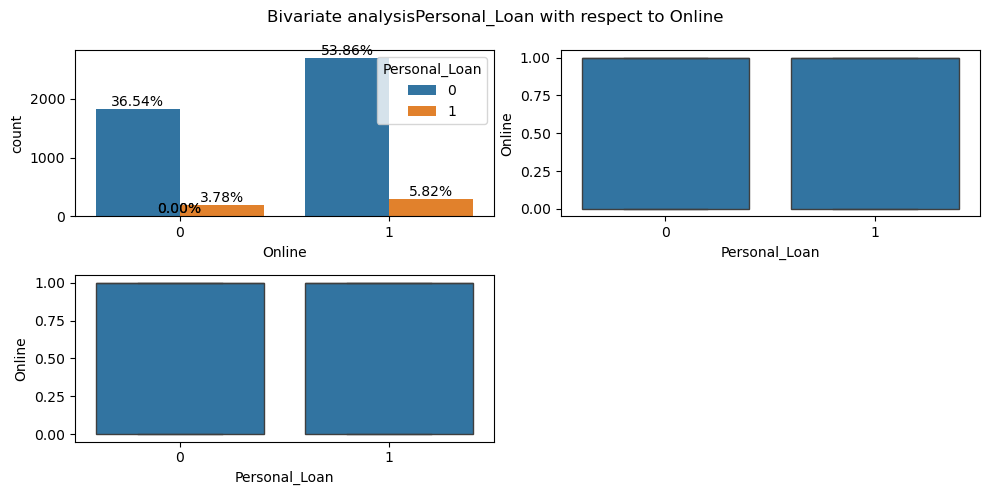

------------------------------------------------------------------------------------------------------------------------------------------------------


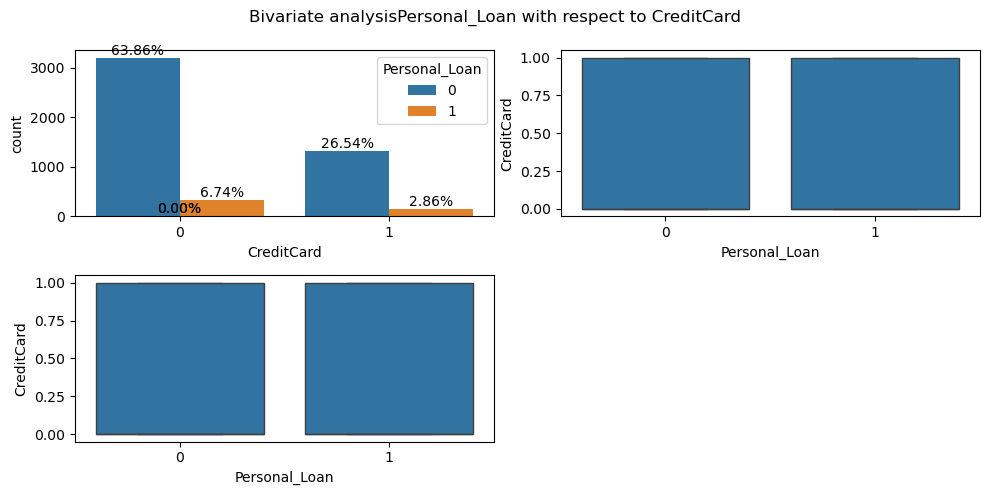

------------------------------------------------------------------------------------------------------------------------------------------------------


In [76]:
Target='Personal_Loan'
for i in Cat_cols:
    bivariate_categoricals_wrt_target(dx,Target,i)
    print('-'*150)

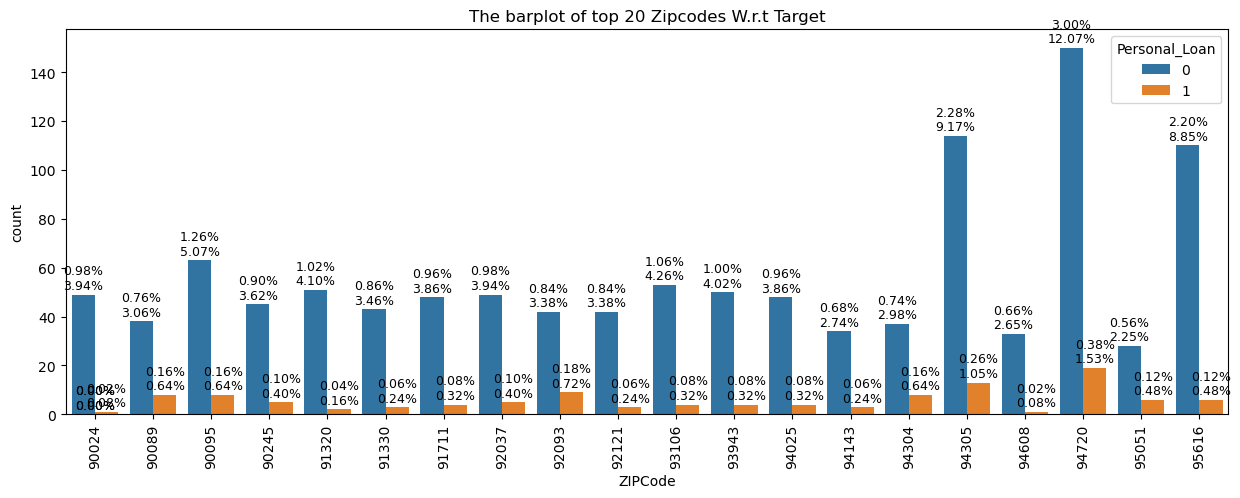

The pecentage of population having loan in top 20 zipcodes:9.332260659694288% 
The percentage of population having loan in all zipcode:9.6%.


In [78]:
# target with top 10 zipcode
t=dx['ZIPCode'].value_counts().head(20).index.tolist()
plt.figure(figsize=(15,5))
s=sns.countplot(data=dx[dx['ZIPCode'].isin(t)],x='ZIPCode',hue=Target)
peer=0
peer20=0
for i in s.patches:
    t20=len(dx[dx['ZIPCode'].isin(t)])
    per20=(i.get_height()/t20)*100
    tot=len(dx)
    per=(i.get_height()/tot)*100
    s.text(i.get_x()+i.get_width()/2,i.get_height()+7,f'{per:.2f}%',fontsize=9,va='bottom',ha='center')
    s.text(i.get_x()+i.get_width()/2,i.get_height()+1,f'{per20:.2f}%',fontsize=9,va='bottom',ha='center')
    
plt.title('The barplot of top 20 Zipcodes W.r.t Target')
plt.xticks(rotation=90);
plt.show()
top_20=dx[dx['ZIPCode'].isin(t)]
loan=dx[dx['Personal_Loan']==1]
t20_loan=top_20[top_20['Personal_Loan']==1]
print(f'The pecentage of population having loan in top 20 zipcodes:{(t20_loan.shape[0]/top_20.shape[0])*100}% \n'
f'The percentage of population having loan in all zipcode:{(loan.shape[0]/dx.shape[0])*100}%.')

# Exploratory Data Analysis (EDA)

## a) Observation of Numerical Columns with Respect to Target

1. **Age**:  
   The `Age` column seems to have a normal distribution with respect to `Personal_Loan`. A normal number of loans is observed between ages 30 to 60 years old.

2. **Experience**:  
   The `Experience` column seems to have a normal distribution with respect to `Personal_Loan`. Loans are commonly accepted by individuals with 5 to 30 years of professional experience. There is no significant change observed for negative experience values, which will be replaced with the median.

3. **Income**:  
   The `Income` column shows that customers with no loans have right-skewed data, while customers with loans have left-skewed data. This indicates that customers with incomes above 100k are more likely to accept loans compared to those with incomes below 100k.

4. **CCAvg**:  
   Customers with `CCAvg` greater than 2.5k USD are more likely to have a `Personal_Loan`.

5. **Mortgage**:  
   Customers with a `Mortgage` are more likely to accept `Personal_Loan`.

---

## b) Observation of Categorical Columns with Respect to Target

1. **Family**:  
   Families with 4 members (**2.68%**) have accepted most `Personal_Loan`. There is an upward trend in loan acceptance from families with 2 members to those with 4 members.

2. **Education**:  
   Customers with `Education` levels of graduate or above are more likely to apply for loans, with the highest number of `Personal_Loan` applications coming from advanced professionals (**4.10%**).

3. **Securities_Account**:  
   There is a weak correlation between having a `Securities_Account` and `Personal_Loan`.

4. **CD_Account**:  
   Customers with a `CD_Account` are more likely to have a `Personal_Loan`.

5. **Online**:  
   There is an insignificant difference in the number of `Personal_Loan` applications between customers who use online banking and those who do not.

6. **CreditCard**:  
   There is an insignificant difference in the number of `Personal_Loan` applications between customers who have a `CreditCard` and those who do not.

7. **ZipCode**:  
   No significant relationship is observed between `ZipCode` and `Personal_Loan`. The data for the top 20 `ZipCode`s reflects similar patterns as the whole dataset. The highest number of `Personal_Loan` applications comes from `ZipCode`: 94720 (Berkeley, California), with **1.53%** of loans in the top 20 and **0.38%** from all data.


**DATA Preprocessing**

**1. Removing `ZipCode`:**

In [85]:
#Removing zipcode
ds=dx.copy()

In [92]:
ds=ds.drop('ZIPCode',axis=1)

**2. Checking and Replacing the Negative Experience years**

In [94]:
# changing the negative experiance values into medians
ds[ds['Experience']<0]['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [95]:
#replacing them with median
median=ds['Experience'].median()
ds.loc[ds['Experience']<0,'Experience']=median

In [96]:
ds[ds['Experience']<0].shape[0]

0

**Model building**
- Since it is classification problem and as per criteria we are going with Decision Tree

**Data Splitting**

In [99]:
# assigning x and y
x=ds.drop('Personal_Loan',axis=1)
y=ds['Personal_Loan']

In [100]:
# checking assignment
y.shape,x.shape

((5000,), (5000, 11))

In [101]:
# here tts is train_test_split imported as tts for ease
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,stratify=y,random_state=33)

**Decision tree Classifier**

**Model evaluation metrics and Functions**

In [104]:
# for Decision Tree classifier

# function for model evaluation showing scores of accuracy, Precision, Recall and f1_score.
def mod_eval_dct(m,p,t):
    pred=m.predict(p)
    acc=accuracy_score(t,pred)
    prci=precision_score(t,pred)
    reca=recall_score(t,pred)
    f1=f1_score(t,pred)
    dg=pd.DataFrame({'Accuracy score':acc,'precision score':prci,'recall Score':reca,'f1_score':f1},index=[1])
    return dg
# function for displaying confusion matrix 
def cm_dct(m,p,t):
    pred=m.predict(p)
    cm=confusion_matrix(t,pred)
    labels=np.asarray([[f'{item:.2f}' + f'\n{(item/cm.flatten().sum())*100:.2f}']for item in cm.flatten()]).reshape(2,2)
    sns.heatmap(cm,annot=labels,fmt='')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Evaluation Criterion

The model's wrong predictions can be categorized as follows:

1. **False Negative (FN):** Predicting that a customer will not accept a personal loan (0), but in reality, the customer does accept it.  
   - **Impact:** Opportunity loss, as the bank misses potential revenue and risks losing the customer altogether.

2. **False Positive (FP):** Predicting that a customer will accept a personal loan (1), but in reality, the customer does not accept it.  
   - **Impact:** Loss of marketing resources due to efforts spent on customers who are unlikely to accept the loan.

---

### Which loss is more significant?  

**Opportunity loss (False Negatives)** is more critical because it results in missed revenue opportunities and the potential loss of a customer. False positives, while undesirable, may still provide some opportunity for conversion with additional effort.

---

### Why are False Positives less significant?  

False positives are less detrimental because they represent customers who were incorrectly predicted to accept a loan. While some marketing resources may be wasted, there is a chance that these customers could still be converted into true positives with extra effort or better-targeted follow-ups. Additionally, false positives are more likely to be reviewed and reconsidered during subsequent interactions compared to false negatives, which are typically overlooked and represent lost opportunities altogether.

---

### How to reduce opportunity loss?  

To minimize false negatives, the model should focus on **maximizing Recall**, ensuring that as many true positives as possible are correctly identified.
  
---

**1.a) Tree Without Pruning**

In [107]:
# decision tree model-1 here dct is DecisionTreeClassifier 
dcm_1=dct()

In [108]:
# fitting the model with x and y taining sets
dcm_1.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
# Evaluating the model on Training set 
mod_eval_dct(dcm_1,x_train,y_train)

Accuracy score  precision score  recall Score  f1_score
1             1.0              1.0           1.0       1.0

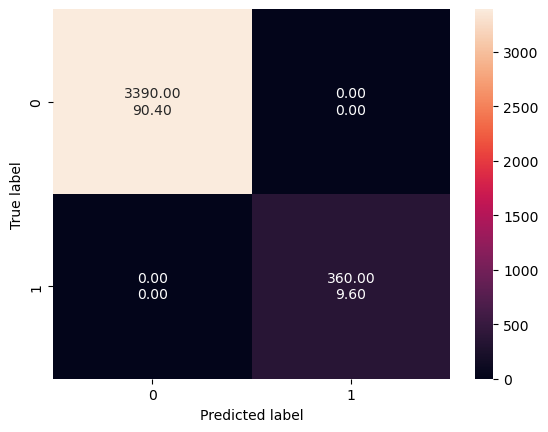

In [110]:
# displaying the confusion matrix of model -1 of training set
cm_dct(dcm_1,x_train,y_train)

In [111]:
# Evaluating the model on Test set 
mod_eval_dct(dcm_1,x_test,y_test)

Accuracy score  precision score  recall Score  f1_score
1          0.9784         0.866142      0.916667  0.890688

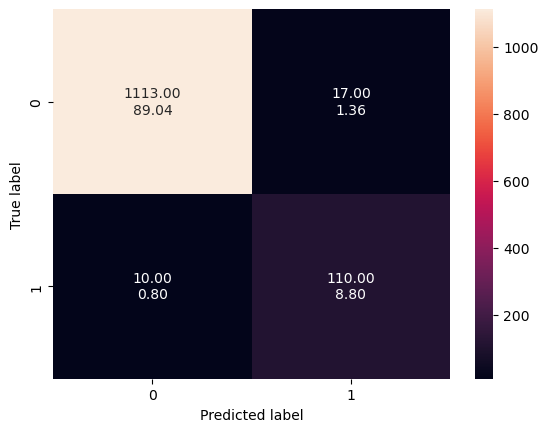

In [135]:
# displaying the confusion matrix of model -1 of test set 
cm_dct(dcm_1,x_test,y_test)

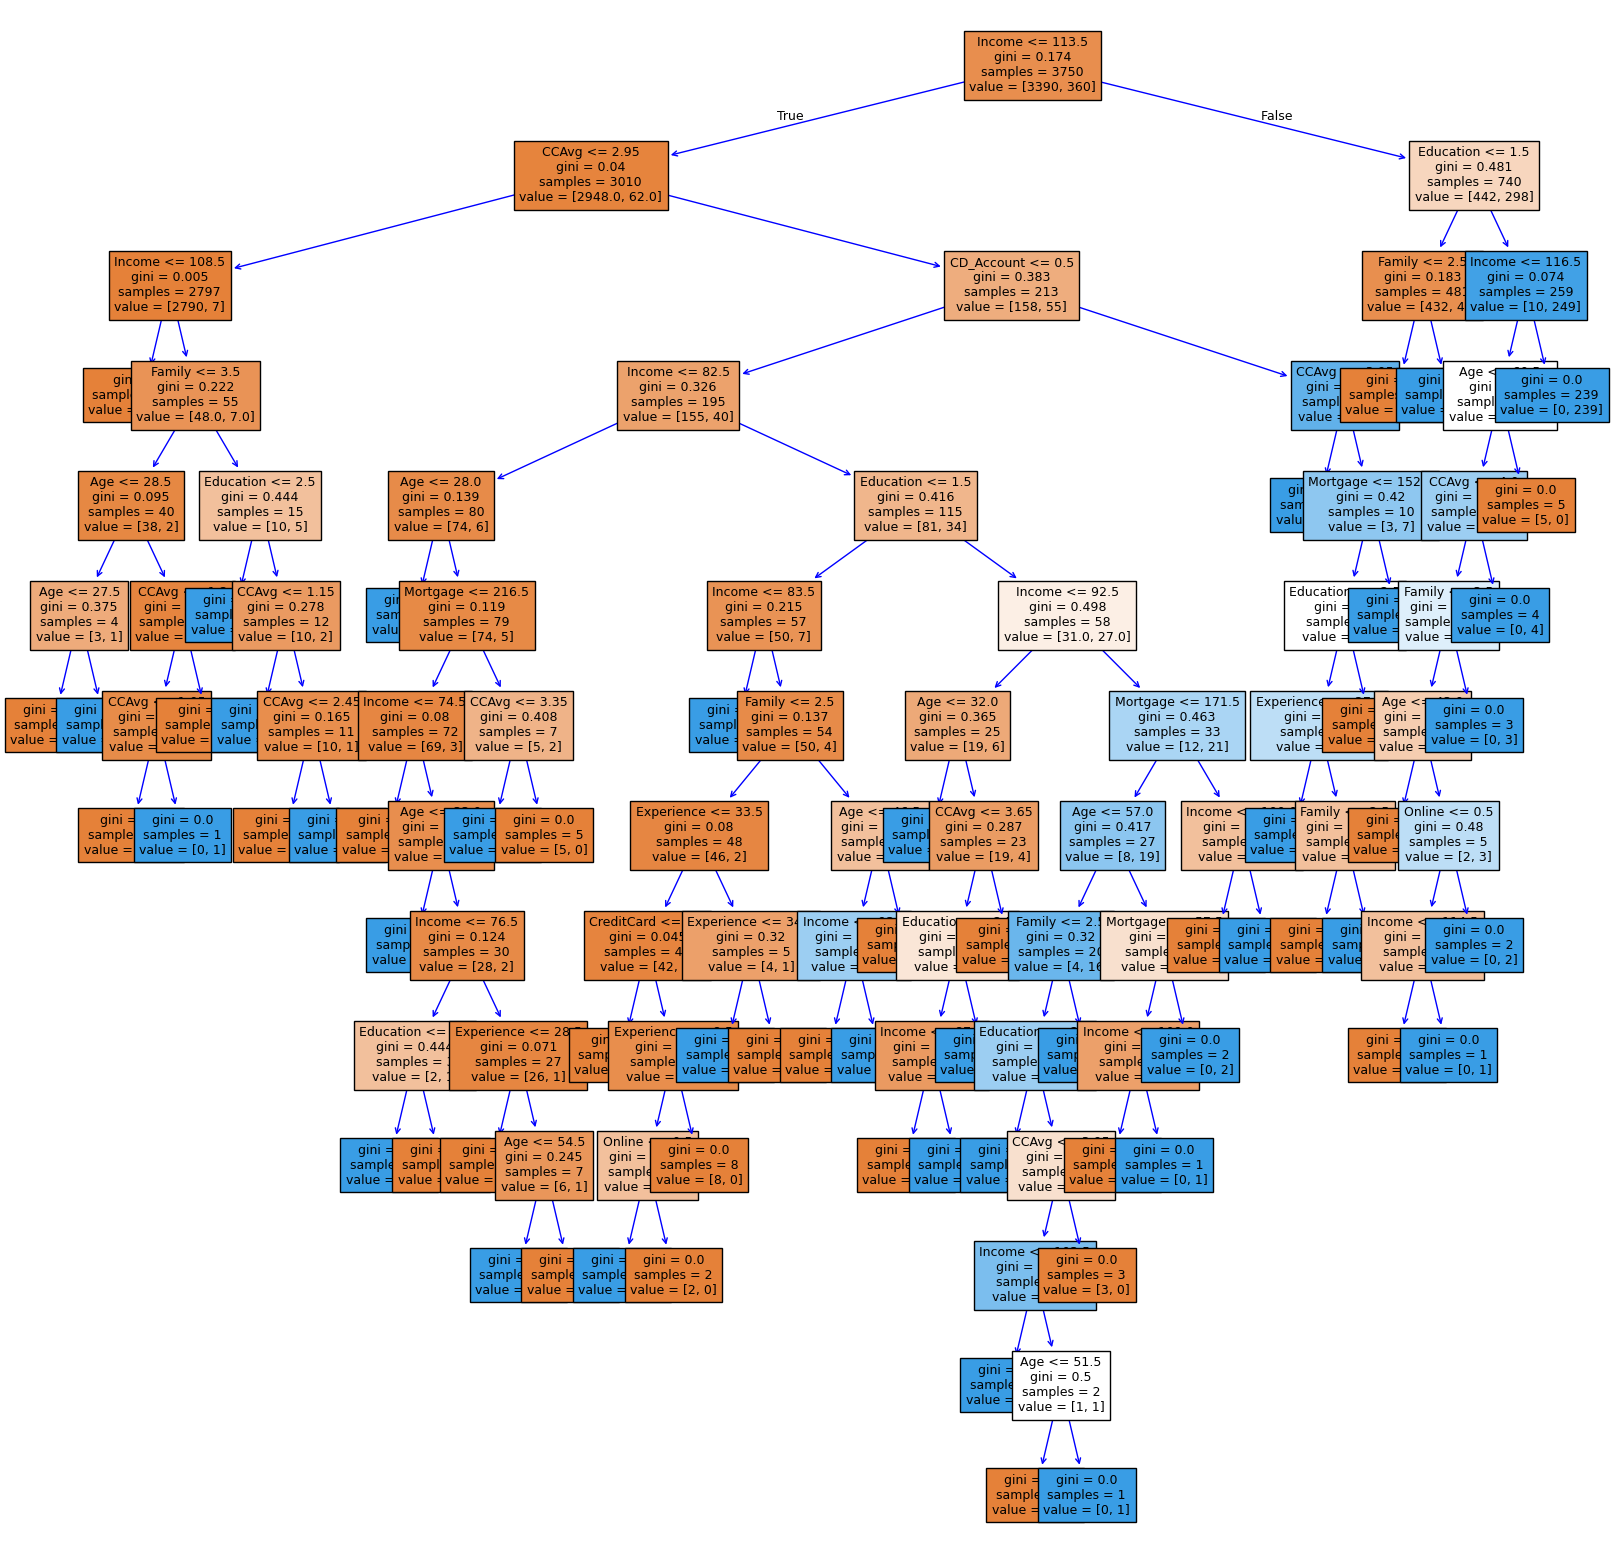

In [137]:
# Displaying Visualisation of tree
f=x.columns
plt.figure(figsize=(20,20))
out=tree.plot_tree(dcm_1,feature_names=f,fontsize=9,filled=True)
for i in out:
    a=i.arrow_patch
    if a is not None:
        a.set_edgecolor('blue')
        a.set_linewidth(1)
plt.show()

In [138]:
# displaying the tree
print(tree.export_text(dcm_1,feature_names=f,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 108.50
|   |   |   |--- weights: [2742.00, 0.00] class: 0
|   |   |--- Income >  108.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  28.50
|   |   |   |   |   |--- CCAvg <= 1.20
|   |   |   |   |   |   |--- CCAvg <= 1.05
|   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  1.05
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- CCAvg >  1.20
|   |   |   |   |   |   |--- weights: [23.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- Education >  2.50
|   |   |   |   |   |--- CCA

### Model Observations: `dcm_1`

- The evaluation metrics for `dcm_1` indicate perfect scores (all metrics equal to one), which strongly suggests **overfitting**.
- Overfitting can also be inferred from the complex structure of the decision tree visualization, as it shows the model attempting to capture anomalies in the training dataset.
- This implies that the model's ability to generalize to new, unseen data is **poor**.


**1.b tree with pre-pruning**

In [143]:
# making a model-dcm_2 with best recall_score using GridSearch with hyperparameter range and 6 cross validation
model=dct(random_state=4)
para={'max_depth':np.arange(2,12,2),'max_leaf_nodes':np.arange(10,100,10),'min_samples_split':np.arange(10,100,10)}
asc=make_scorer(recall_score)
mod=GridSearchCV(model,para,scoring=asc,cv=6)
mod.fit(x_train,y_train)
dcm_2=mod.best_estimator_
dcm_2

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, min_samples_split=10,
                       random_state=4)

In [192]:
print("NaN in x_train:", np.any(np.isnan(x_train)))
print("NaN in y_train:", np.any(np.isnan(y_train)))
print("Inf in x_train:", np.any(np.isinf(x_train)))
print("Inf in y_train:", np.any(np.isinf(y_train)))

NaN in x_train: False
NaN in y_train: False
Inf in x_train: False
Inf in y_train: False


In [202]:
y_train.dtypes

dtype('int64')

In [190]:
# making a model-dcm_2 with best recall_score using GridSearch with hyperparameter range and 6 cross validation
modelr=dct(random_state=4)
parar={'max_depth':np.arange(2,12,1),'max_leaf_nodes':np.arange(10,100,5),'min_samples_split':np.arange(10,100,5)}
asic=make_scorer(recall_score)
moid=GridSearchCV(modelr,parar,scoring=asic,cv=6)
moid.fit(x_train,y_train)
dcm_5=moid.best_estimator_
dcm_5

Z:\anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=9, max_leaf_nodes=20, min_samples_split=10,
                       random_state=4)

In [144]:
# evaluation of model with training set
mod_eval_dct(dcm_2,x_train,y_train)

Accuracy score  precision score  recall Score  f1_score
1        0.990667         0.945205      0.958333  0.951724

In [204]:
mod_eval_dct(dcm_5,x_train,y_train)

Accuracy score  precision score  recall Score  f1_score
1        0.990667         0.945205      0.958333  0.951724

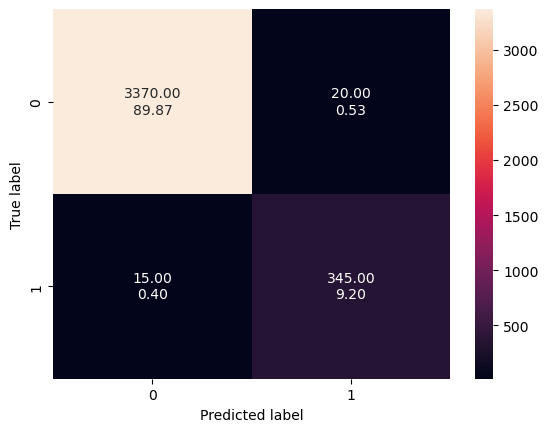

In [153]:
#Displaying the confusion matrix of the model on training set
cm_dct(dcm_2,x_train,y_train)

In [155]:
# evaluation of model with training set
mod_eval_dct(dcm_2,x_test,y_test)

Accuracy score  precision score  recall Score  f1_score
1          0.9832         0.889764      0.941667   0.91498

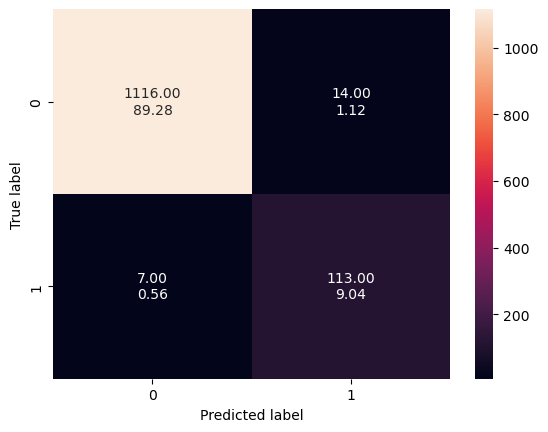

In [157]:
#Displaying the confusion matrix of the model on training set
cm_dct(dcm_2,x_test,y_test)

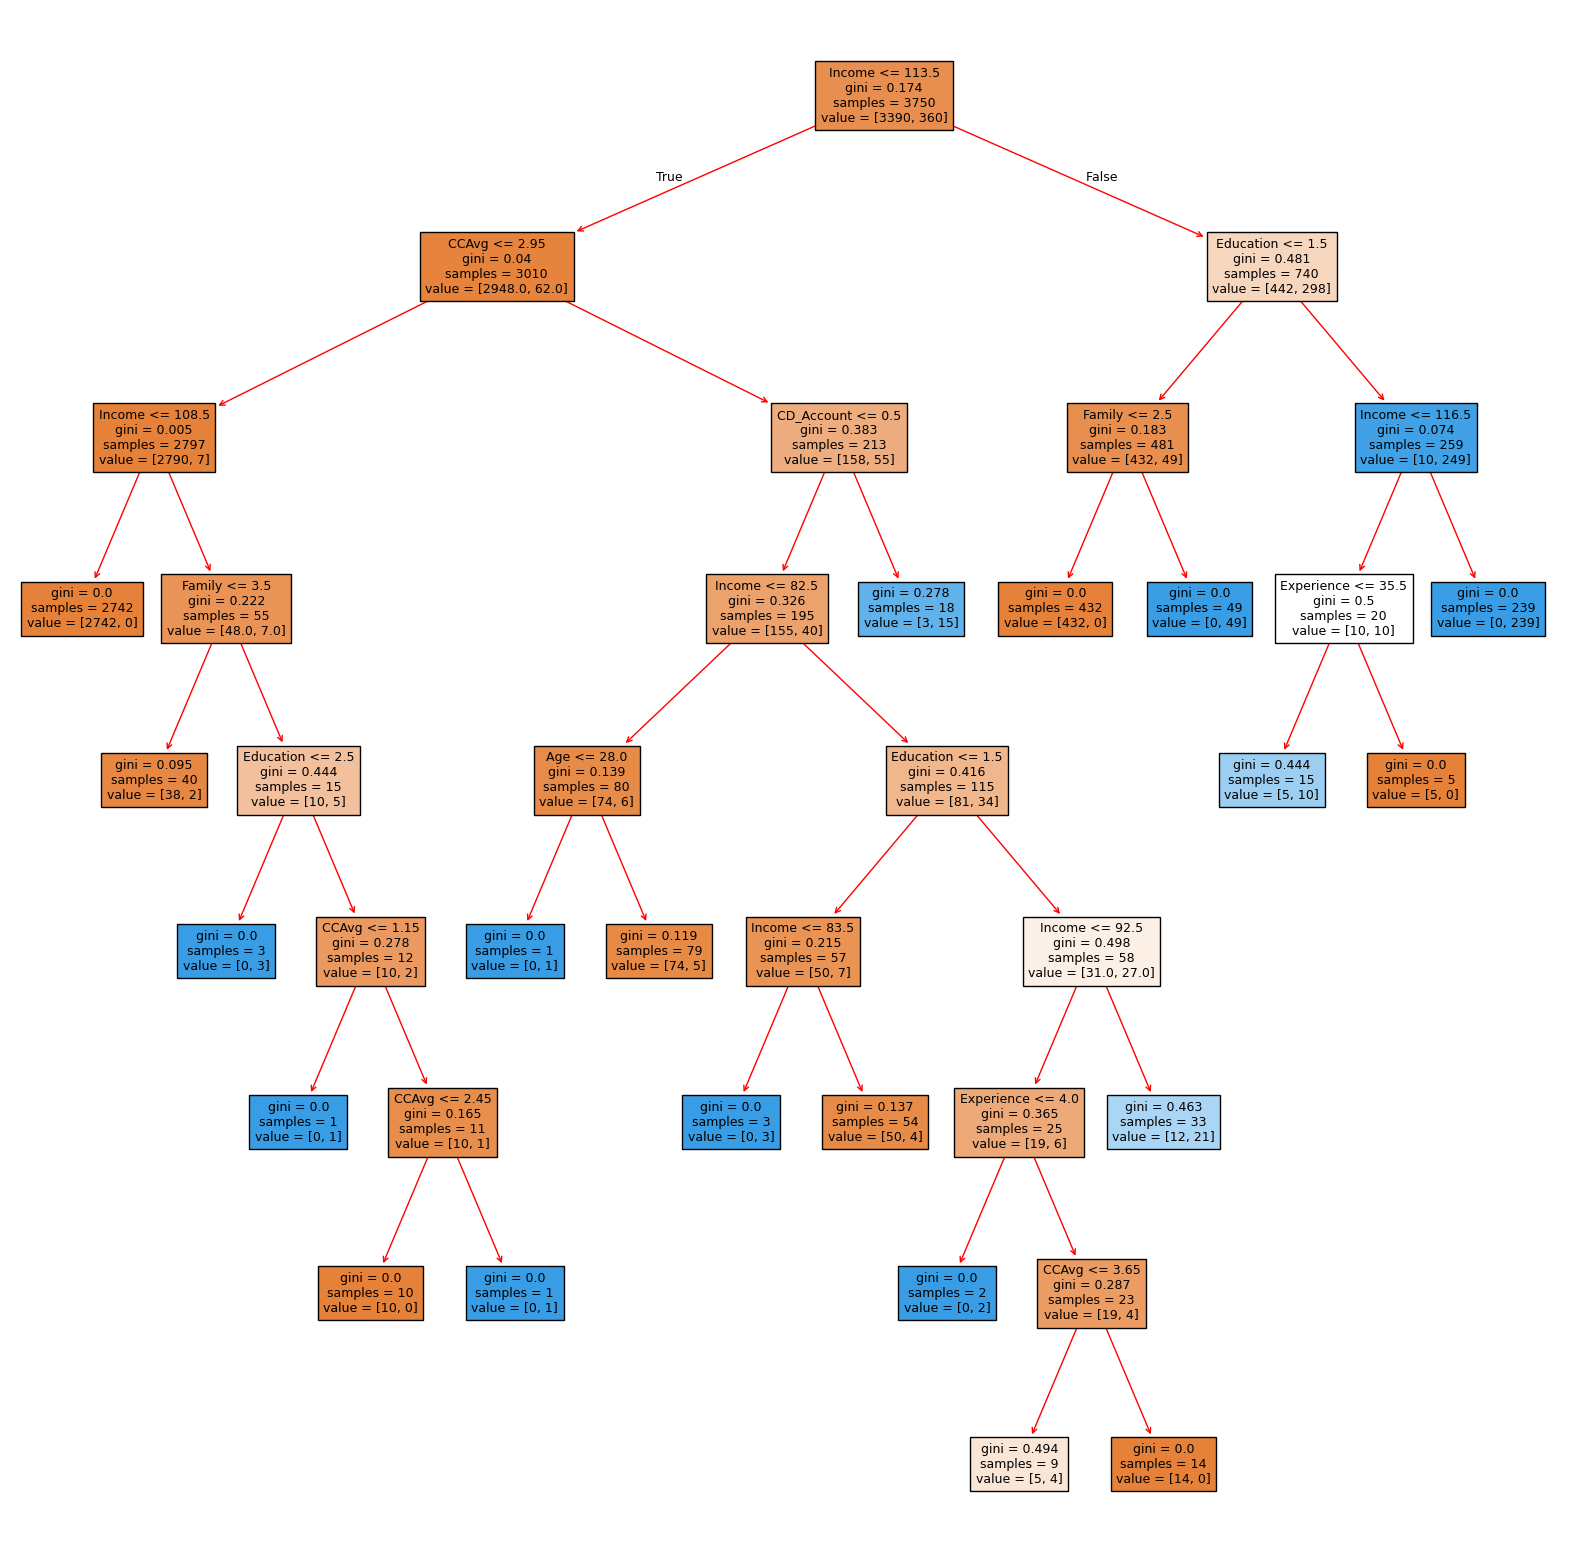

In [159]:
# Displaying the visualization of Pre-Pruned tree 
plt.figure(figsize=(20,20))
out2=tree.plot_tree(dcm_2,feature_names=f,filled=True,fontsize=9)
for i in out2:
    a=i.arrow_patch
    if a is not None:
        a.set_edgecolor('red')
        a.set_linewidth(1)
plt.show()

In [160]:
#displaying the tree
print(tree.export_text(dcm_2,feature_names=f,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 108.50
|   |   |   |--- weights: [2742.00, 0.00] class: 0
|   |   |--- Income >  108.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [38.00, 2.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- Education >  2.50
|   |   |   |   |   |--- CCAvg <= 1.15
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- CCAvg >  1.15
|   |   |   |   |   |   |--- CCAvg <= 2.45
|   |   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.45
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- Age <= 28.00
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  28.00
|   |   |   |   |   |--- wei

### Model observations: `dcm_2`
- The model has good test scores(`accuracy_score`: 0.9832, `precision_score`: 0.889764, `recall_score`: 0.94166, `f1_score`: 0.91498) without overfitting of the data.
- This model has better generalisation than dcm_1.

**3. Tree with Post-Pruning**

In [166]:
# making a model for post pruning
dc_3=dct()

In [168]:
# fitting the model with training data
dc_3.fit(x_train,y_train)

DecisionTreeClassifier()

In [170]:
# initialising cost_complexity_pruning_path and taking ccp_alphas and impurities
path=dc_3.cost_complexity_pruning_path(x_train,y_train)
c_alphas,c_impurities=path['ccp_alphas'],path['impurities']

In [172]:
# making a list of trees(models) with all the ccp_alphas
tree_list=[]
for i in c_alphas:
    tre=dct(ccp_alpha=i,random_state=4)
    tre.fit(x_train,y_train)
    tree_list.append(tre)

In [174]:
# list the recall test scores and trainig scores of all the trees 
test_score=[recall_score(y_test,i.predict(x_test)) for i in tree_list]
tes_score=[cross_val_score(i,x_test,y_test,scoring='recall',cv=6).mean() for i in tree_list]
train_score=[recall_score(y_train,i.predict(x_train)) for i in tree_list]
trai_score=[cross_val_score(i,x_train,y_train,scoring='recall',cv=6).mean() for i in tree_list]

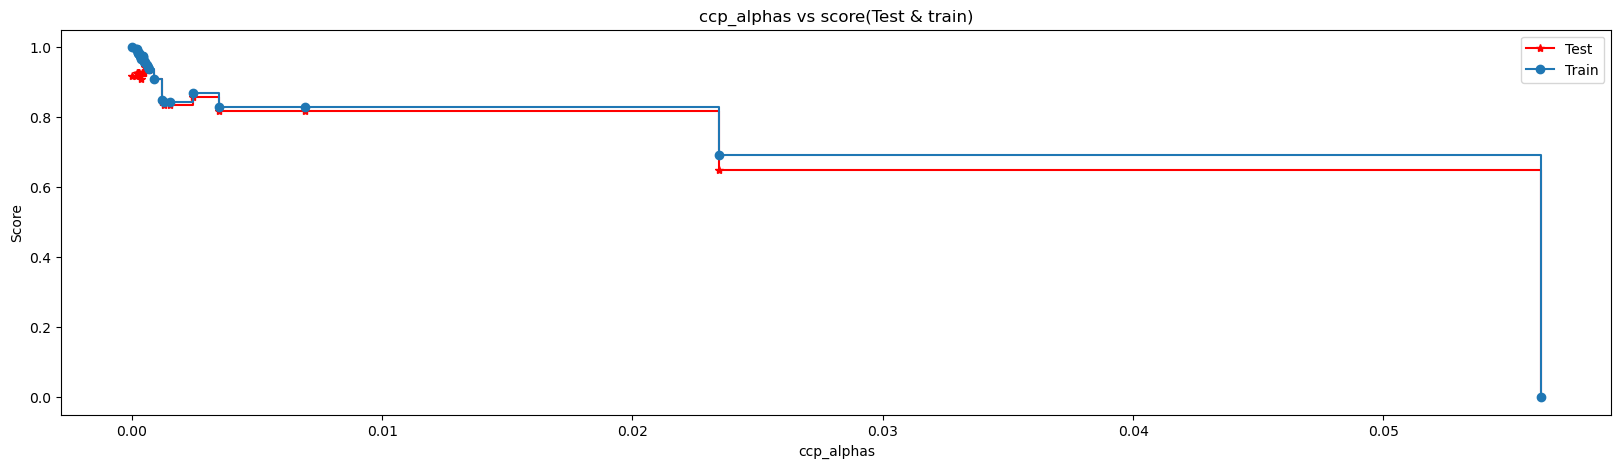

In [176]:
# plotting the test scores and training scores against the ccp_alphas to visualize the relationship
plt.figure(figsize=(20,5))
plt.plot(c_alphas,test_score,label='Test',marker='*',color='Red',drawstyle="steps-post")
plt.plot(c_alphas,train_score,label='Train',marker='o',drawstyle="steps-post")
plt.xlabel('ccp_alphas')
plt.ylabel('Score')
plt.title("ccp_alphas vs score(Test & train)")
plt.legend()
plt.show()

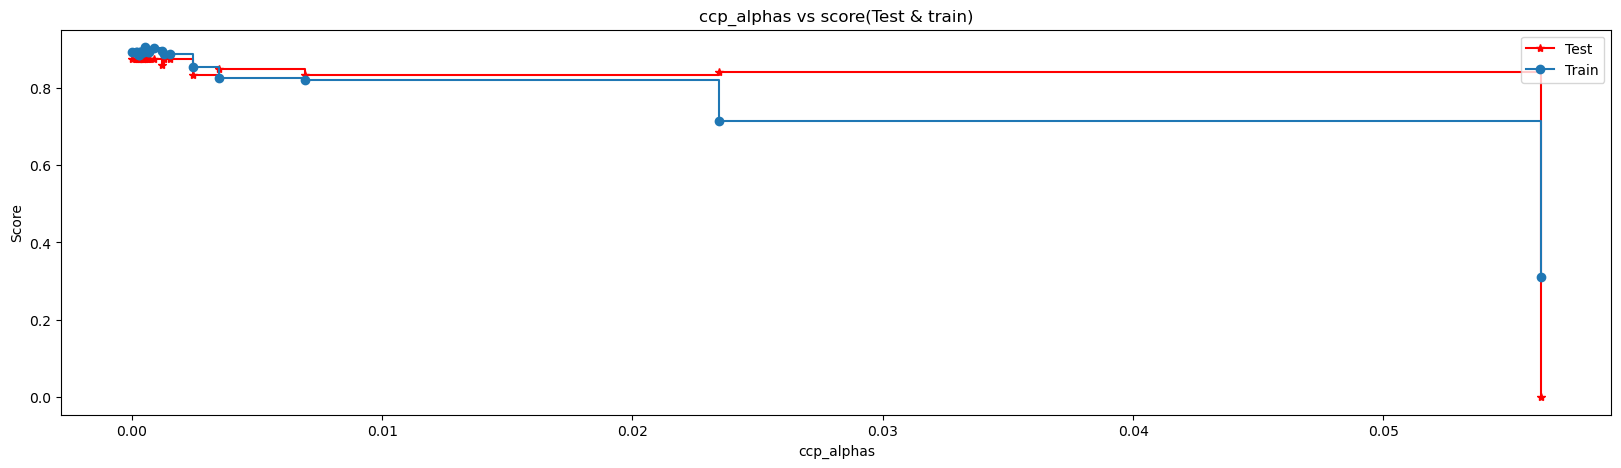

In [178]:
# plotting the test scores and training scores against the ccp_alphas to visualize the relationship
plt.figure(figsize=(20,5))
plt.plot(c_alphas,tes_score,label='Test',marker='*',color='Red',drawstyle="steps-post")
plt.plot(c_alphas,trai_score,label='Train',marker='o',drawstyle="steps-post")
plt.xlabel('ccp_alphas')
plt.ylabel('Score')
plt.title("ccp_alphas vs score(Test & train)")
plt.legend()
plt.show()

In [180]:
# getting the index of model with best(largest) test score and assigning it as dcm_3 
best_tree_index=np.argmax(test_score)
dcm_4=tree_list[best_tree_index]
dcm_4

DecisionTreeClassifier(ccp_alpha=0.000535129068462402, random_state=4)

In [182]:
# getting the index of model with best(largest) test score and assigning it as dcm_3 
best_tree_index=np.argmax(test_score)
dcm_3=tree_list[best_tree_index]
dcm_3

DecisionTreeClassifier(ccp_alpha=0.000535129068462402, random_state=4)

In [194]:
# Evaluation of post prunned Tree with Training dataset
mod_eval_dct(dcm_3,x_train,y_train)

Accuracy score  precision score  recall Score  f1_score
1        0.990667         0.945205      0.958333  0.951724

In [184]:
# Evaluation of post prunned Tree with Training dataset
mod_eval_dct(dcm_4,x_train,y_train)

Accuracy score  precision score  recall Score  f1_score
1        0.990667         0.945205      0.958333  0.951724

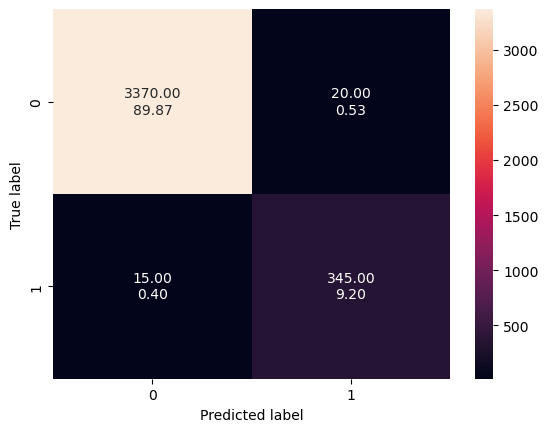

In [196]:
# displaying the confusion matrix with training dataset  
cm_dct(dcm_3,x_train,y_train)

In [200]:
# Evaluation of post prunned Tree with Test dataset
mod_eval_dct(dcm_3,x_test,y_test)

Accuracy score  precision score  recall Score  f1_score
1            0.98         0.862595      0.941667  0.900398

In [186]:
# Evaluation of post prunned Tree with Test dataset
mod_eval_dct(dcm_4,x_test,y_test)

Accuracy score  precision score  recall Score  f1_score
1            0.98         0.862595      0.941667  0.900398

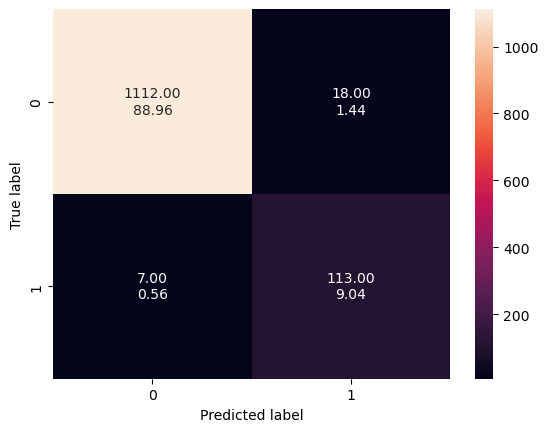

In [202]:
# displaying the confusion matrix with test dataset
cm_dct(dcm_3,x_test,y_test)

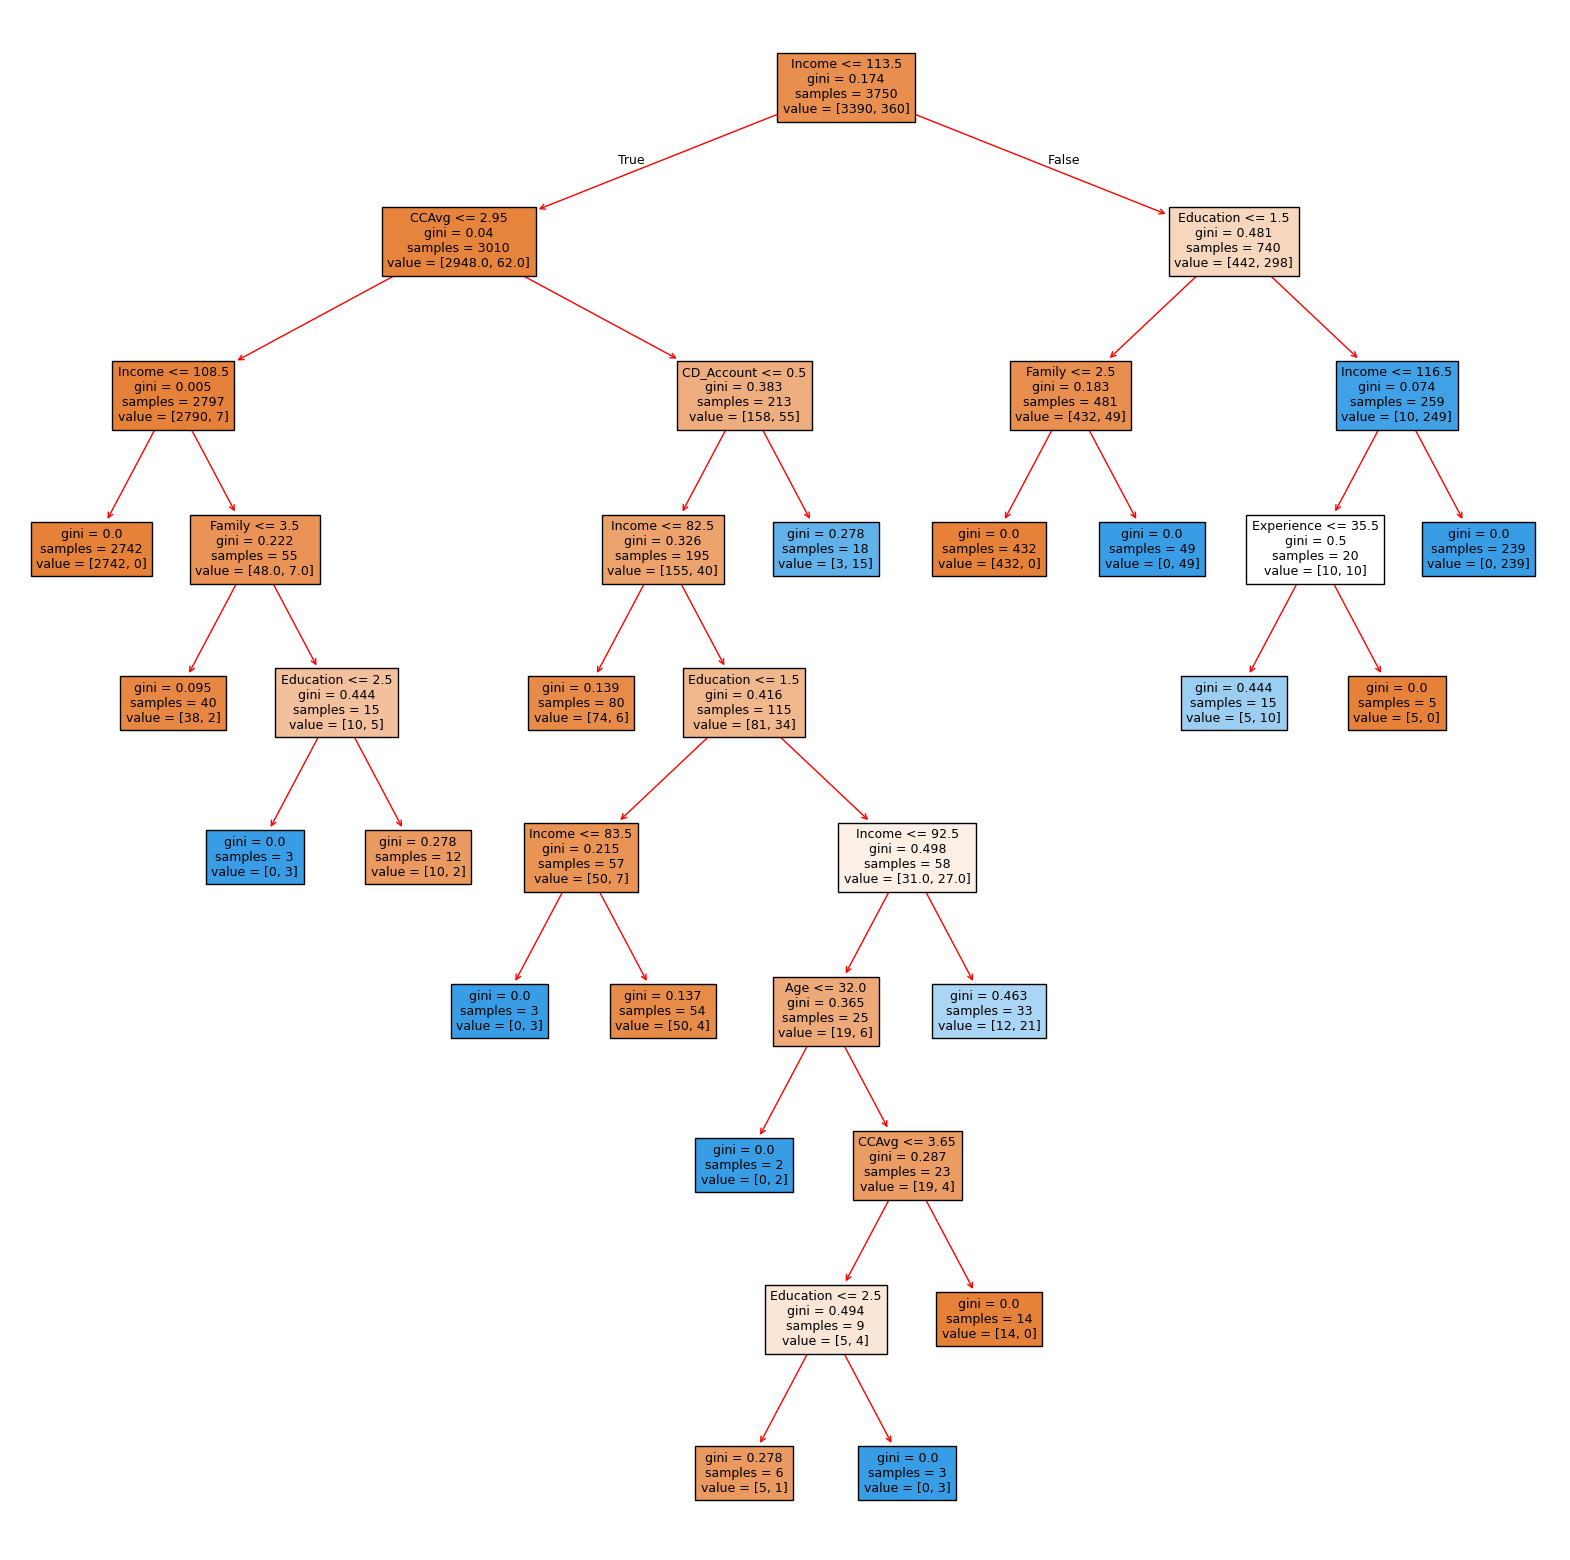

In [204]:
# displaying the visualisation of the tree
plt.figure(figsize=(20,20))
out3=tree.plot_tree(dcm_3,feature_names=f,filled=True,fontsize=9)
for i in out3:
    a=i.arrow_patch
    if a is not None:
        a.set_edgecolor('red')
        a.set_linewidth(1)
plt.show()

In [206]:
# Displaying the tree
print(tree.export_text(dcm_3,feature_names=f,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 108.50
|   |   |   |--- weights: [2742.00, 0.00] class: 0
|   |   |--- Income >  108.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [38.00, 2.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- Education >  2.50
|   |   |   |   |   |--- weights: [10.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 6.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- Income <= 83.50
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- Income >  83.50
|   |   |   |   |   |   |--- weights: [50.00, 4.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Income <= 92.50
|   |   |   |   |   |   |--- Age <= 32.0

### Model observations: `dcm_2`
- The model has good test scores(`accuracy_score`: 0.9832, `precision_score`: 0.862595, `recall_score`: 0.941667, `f1_score`: 0.900398) without overfitting of the data.
- This model has better generalisation than `dcm_1`.		

**Evaluation of model**

In [223]:
# compling all three tree evaluation for Training Dataset 
mod_evaluation_Train=pd.concat([mod_eval_dct(dcm_1,x_train,y_train).T,mod_eval_dct(dcm_2,x_train,y_train).T,mod_eval_dct(dcm_3,x_train,y_train).T],axis=1)
mod_evaluation_Train.columns=[
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print('-'*30+'The evaluation of Training set'+'-'*35)
mod_evaluation_Train

------------------------------The evaluation of Training set-----------------------------------


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy score                               1.0                     0.990667   
precision score                              1.0                     0.945205   
recall Score                                 1.0                     0.958333   
f1_score                                     1.0                     0.951724   

                 Decision Tree (Post-Pruning)  
Accuracy score                       0.990667  
precision score                      0.945205  
recall Score                         0.958333  
f1_score                             0.951724

In [225]:
# compling all three tree evaluation for Training Dataset
mod_evaluation_Test=pd.concat([mod_eval_dct(dcm_1,x_test,y_test).T,mod_eval_dct(dcm_2,x_test,y_test).T,mod_eval_dct(dcm_3,x_test,y_test).T],axis=1)
mod_evaluation_Test.columns=[
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print('-'*30+'The evaluation of Test set'+'-'*35)
mod_evaluation_Test

------------------------------The evaluation of Test set-----------------------------------


Decision Tree (sklearn default)  Decision Tree (Pre-Pruning)  \
Accuracy score                          0.978400                     0.983200   
precision score                         0.866142                     0.889764   
recall Score                            0.916667                     0.941667   
f1_score                                0.890688                     0.914980   

                 Decision Tree (Post-Pruning)  
Accuracy score                       0.980000  
precision score                      0.862595  
recall Score                         0.941667  
f1_score                             0.900398

### Model Selection:
1. The default decision tree (`dcm_1`) demonstrates **overfitting**, as evident from perfect metrics on the training dataset but reduced performance on the test dataset.

2. On the **training dataset**, the evaluation metrics for both the pre-pruned tree (`dcm_2`) and post-pruned tree (`dcm_3`) are **identical**, indicating similar generalization abilities within the training data.

3. On the **test dataset**, the pre-pruned tree (`dcm_2`) outperforms the post-pruned tree (`dcm_3`) across all metrics except for recall, where both models have **identical recall scores**.

4. While both pre-pruned (`dcm_2`) and post-pruned (`dcm_3`) models achieve the same recall score, the **pre-pruned tree (`dcm_2`)** is selected due to its overall better performance on the test dataset.
  

## Feature Importances of the best tree `dcm_2(pre)`

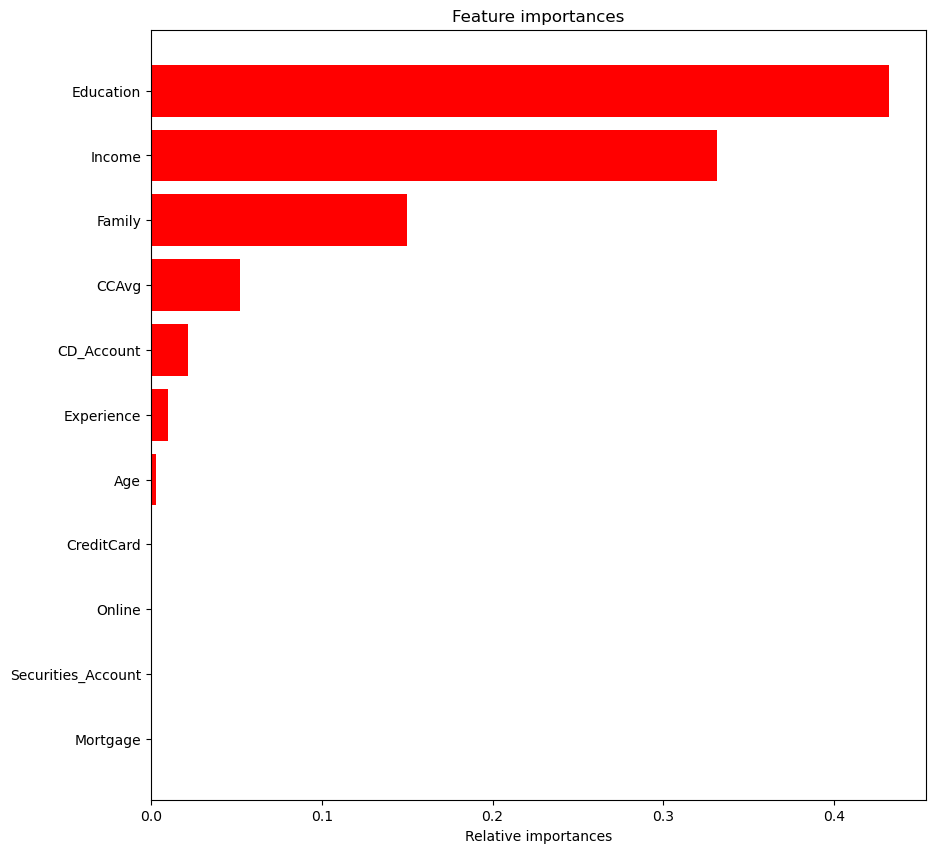

In [234]:
# feature Importances of the best Tree
importance= dcm_2.feature_importances_
indices=np.argsort(importance)
plt.figure(figsize=(10,10))
plt.barh(range(len(indices)),importance[indices],color='red',align='center')
plt.yticks(range(len(indices)),[f[i] for i in indices])
plt.xlabel('Relative importances')
plt.title('Feature importances')
plt.show()

**Feature importance observation on the best tree:**
- `Education` and `Income` are the most influential attributes in determining whether customer would take `Personal_Loan` or not.
- `Family` and `CCAvg`  are the next best attributes to consider.

### Points from Observations and Suggestions for the Marketing Team:

1. **Key Variables for Personal Loan Prediction**:  
   Decision tree models have identified the following as the most critical factors in determining whether a customer will accept a personal loan:  
   - **`Age`**  
   - **`Family` Size (2 or above members)**  
   - **`Income` (middle range)**
   - **Credit Card Average Spending (`CCAvg` > 1.5k)**  
   - **`Education` Level (Graduate and above)**
   - **`Experience`**
   - **`Mortgage`**  
   - **`CD Account`**  

2. **Targeting Liability to Asset Conversion**:  
   Customers with `Age` **30 to 40 years** with an `Education` level of **Graduate and above** are ideal targets for conversion to asset customers. Data reveals that customers in this segment are more likely to accept Personal loans.

3. **Targeting High Credit Card Spenders**:  
   Customers with an average monthly credit card spending **above 1.5k USD** are promising candidates for personal loans. However, the marketing team should exercise caution, as higher spending may indicate a risk of default.

4. **Income and Mortgage Segment**:  
   Customers earning between **100k to 200k USD** and those with mortgages show a higher probability of accepting personal loans and becoming asset customers.

5. **Avoiding Retiring Customers**:  
   Customers with **longer working experience** are less likely to accept personal loan offers. These customers, often nearing retirement, generally do not require personal loans. The marketing team should deprioritize this segment.

6. **Focusing on CD Account Holders**:  
   Customers with **CD accounts** are ideal targets for personal loans. These customers pose a lower risk, as their deposits can serve as collateral if necessary.

7. **Enhancing the Model with Additional Data**:  
   To further improve the predictive power of the model, the marketing team should consider incorporating additional relevant data variables. This could lead to better segmentation and more accurate targeting.

By adopting these strategies, the marketing team can optimize their campaigns to drive conversions, reduce risk, and maximize efficiency.

